# Analysis of Brexit landscape in UK political events using Twitter

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle
import zipfile

%matplotlib inline

In [2]:
from textblob import TextBlob
import re

# 1
1.	Suggest a script using a sentiment analyzer of your choice and outcomes the sentiment polarity of each tweet in the collection. Draw the histogram of positive, negative and neutral polarity tweets. 

In [4]:
def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

In [5]:

def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    # private solution

In [6]:
def get_tweets():
  file_name = 'tweets_df.pkl'
  if os.path.exists(file_name):
    return pd.read_pickle(file_name)


  with zipfile.ZipFile('brexit_data_project_BDD-kaggle.zip') as z:    
    with z.open('tweets.clean.csv') as f:
        tweets = pd.read_csv(f,
                             delimiter = ';',
                             names = ["id", 'Tweet'])
  tweets['sentiment_analysis'] = np.array([analize_sentiment(t) for t in tweets['Tweet']])
  tweets.to_pickle(fine_name) # save df
  return tweets


In [7]:
tweets = get_tweets()

In [7]:
tweets.head(10)

,id,Tweet,sentiment_analysis
0,1467810369,http twitpic com Awww,positive
1,1467810917,I dived many times ball Managed save The rest ...,positive
2,1467811184,whole body feels itchy like fire,positive
3,1467811193,no,neutral
4,1467811592,Need hug,neutral
5,1467811594,hey long time no see Yes Rains bit,negative
6,1467812416,spring break plain city snowing,negative
7,1467812579,I just re pierced ears,neutral
8,1467812723,I bear watch it And I thought UA loss embarras...,neutral
9,1467812771,It counts,neutral


<AxesSubplot:xlabel='sentiment_analysis'>

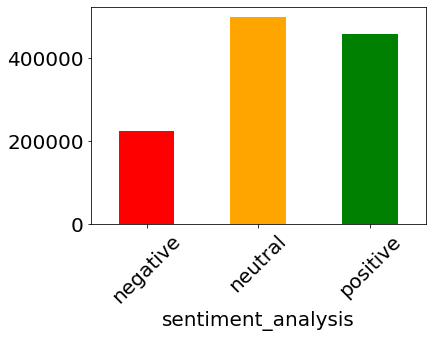

In [125]:
t = tweets.groupby('sentiment_analysis').count()
tt = t.reset_index()
tt.plot.bar(x = 'sentiment_analysis', y = 'Tweet', color = ['red', 'orange', 'green'], legend = False, rot = 45)

<AxesSubplot:ylabel='Tweet'>

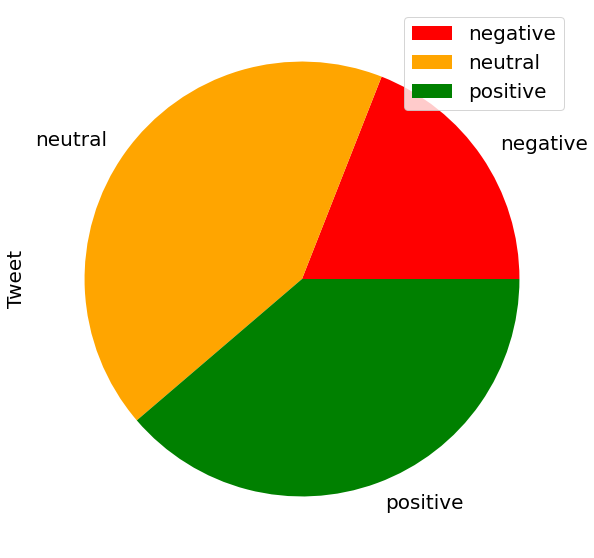

In [126]:
t.plot.pie(y='Tweet', colors = ['red', 'orange', 'green'], figsize = (10, 10))

# 2
2.	We want group all posts of positive sentiment together as a single document, and those of negative sentiment together, and finally, neutral sentiment posts as a single document as well. For each of  these documents, perform LDA operation with number of topics =10 and number of words per topics =10.

In [46]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim import corpora, models


from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *


import numpy as np
from pprint import pprint


stemmer = SnowballStemmer("english")

import nltk

In [14]:
def lemmatize_stemming(text):
    # private solution

def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [15]:
def get_tweets_for_LDA():
  file_name = 'tweets_for_LDA.dict'
  if os.path.exists(file_name):
    with open(file_name, 'rb') as f:
      d = pickle.load(f)
    return d

  try:
    tweets
  except NameError:
    tweets = get_tweets()

  d = {
    'positive' : tweets[tweets['sentiment_analysis'] == 'positive']['Tweet'],
    'neutral' : tweets[tweets['sentiment_analysis'] == 'neutral']['Tweet'],
    'negative' : tweets[tweets['sentiment_analysis'] == 'negative']['Tweet']
    }
  with open(file_name, 'wb') as f:
    pickle.dump(d, f)
  return d

In [13]:
tweets_for_LDA = get_tweets_for_LDA()

In [16]:
#nltk.download('wordnet')

def get_processed_tweets():
  file_name = 'processed_tweets.dict'
  if os.path.exists(file_name):
    with open(file_name, 'rb') as f:
      d = pickle.load(f)
    return d

  try:
    tweets_for_LDA
  except NameError:
    tweets_for_LDA = get_tweets_for_LDA()

  d = {
    'positive': tweets_for_LDA['positive'].map(preprocess),
    'neutral': tweets_for_LDA['neutral'].map(preprocess),
    'negative': tweets_for_LDA['negative'].map(preprocess)
  }

  with open(file_name, 'wb') as f:
    pickle.dump(d, f)

  return d

In [15]:

processed_tweets = get_processed_tweets()

In [17]:
def get_dictionary():
  file_name = 'get_dictionary.dict'
  if os.path.exists(file_name):
    with open(file_name, 'rb') as f:
      d = pickle.load(f)
    return d

  try:
    processed_tweets
  except NameError:
    processed_tweets = get_processed_tweets()

  d = {
    'positive': gensim.corpora.Dictionary(processed_tweets['positive']),
    'neutral': gensim.corpora.Dictionary(processed_tweets['neutral']),
    'negative': gensim.corpora.Dictionary(processed_tweets['negative'])
  } 

  with open(file_name, 'wb') as f:
    pickle.dump(d, f)
    
  return d

In [17]:
dictionary = get_dictionary()

In [18]:
def get_bow_corpus():
  file_name = 'get_bow_corpus.dict'
  if os.path.exists(file_name):
    with open(file_name, 'rb') as f:
      d = pickle.load(f)
    return d

  try:
    dictionary
  except NameError:
    dictionary = get_dictionary()

  # private solution

  with open(file_name, 'wb') as f:
    pickle.dump(d, f)
    
  return d

In [19]:
bow_corpus = get_bow_corpus()

In [19]:
def get_tfidf():
  file_name = 'get_tfidf.dict'
  if os.path.exists(file_name):
    with open(file_name, 'rb') as f:
      d = pickle.load(f)
    return d

  try:
    bow_corpus
  except NameError:
    bow_corpus = get_bow_corpus()

  # private solution

  with open(file_name, 'wb') as f:
    pickle.dump(d, f)
    
  return d

In [21]:
tfidf = get_tfidf()

In [20]:
def get_corpus_tfidf():
  file_name = 'get_corpus_tfidf.dict'
  if os.path.exists(file_name):
    with open(file_name, 'rb') as f:
      d = pickle.load(f)
    return d

  try:
    tfidf
  except NameError:
    tfidf = get_tfidf()

  # private solution 

  with open(file_name, 'wb') as f:
    pickle.dump(d, f)
    
  return d

In [23]:
corpus_tfidf = get_corpus_tfidf()

In [21]:
def get_lda_BoW_model():
  file_name = 'get_lda_BoW_model.dict'
  if os.path.exists(file_name):
    with open(file_name, 'rb') as f:
      d = pickle.load(f)
    return d

  try:
    bow_corpus
  except NameError:
    bow_corpus = get_bow_corpus()

  # private solution 

  with open(file_name, 'wb') as f:
    pickle.dump(d, f)
    
  return d

In [22]:
# LDA model using BoWs
lda_model = get_lda_BoW_model()

In [87]:
def get_lda_BoW_model_set_of_topics():
    file_name = 'get_lda_BoW_model_set_of_topics.set'
    if os.path.exists(file_name):
        with open(file_name, 'rb') as f:
            m = pickle.load(f)
        return m
    
    try:
        lda_model
    except NameError:
        lda_model = get_lda_BoW_model()
        
    # private solution
    
    with open(file_name, 'wb') as f:
        pickle.dump(d, f)        
    return d

### 2. Showing 10 topics with 10 words in each category using LDA with BoWs:

In [26]:
for k in lda_model.keys():
    print('=' * 20)
    print(k, 'documents')
    print('=' * 20)
    for idx, topic in lda_model[k].print_topics(num_topics = 10, num_words = 10):
        print(f'Topic: {idx} \nWords: {topic}')

positive documents
Topic: 0 
Words: 0.156*"thank" + 0.037*"sure" + 0.031*"week" + 0.020*"weekend" + 0.017*"busi" + 0.015*"true" + 0.012*"time" + 0.012*"pretti" + 0.012*"go" + 0.011*"work"
Topic: 1 
Words: 0.050*"best" + 0.031*"friend" + 0.023*"song" + 0.021*"listen" + 0.019*"play" + 0.019*"help" + 0.017*"music" + 0.016*"home" + 0.015*"go" + 0.015*"parti"
Topic: 2 
Words: 0.041*"better" + 0.037*"glad" + 0.021*"read" + 0.020*"think" + 0.016*"thing" + 0.013*"like" + 0.013*"interest" + 0.012*"awww" + 0.012*"feel" + 0.012*"book"
Topic: 3 
Words: 0.213*"good" + 0.059*"morn" + 0.047*"night" + 0.041*"nice" + 0.026*"today" + 0.022*"sleep" + 0.017*"luck" + 0.016*"time" + 0.016*"earli" + 0.015*"go"
Topic: 4 
Words: 0.055*"want" + 0.044*"follow" + 0.044*"thank" + 0.030*"wish" + 0.016*"real" + 0.013*"enjoy" + 0.012*"clean" + 0.011*"come" + 0.010*"damn" + 0.009*"brother"
Topic: 5 
Words: 0.047*"cool" + 0.046*"get" + 0.040*"readi" + 0.038*"work" + 0.033*"beauti" + 0.023*"okay" + 0.022*"live" + 0.014*

In [92]:
def get_lda_tfidf_model():
  file_name = 'lda_tfidf_model.dict'
  if os.path.exists(file_name):
    with open(file_name, 'rb') as f:
      d = pickle.load(f)
    return d

  try:
    corpus_tfidf
  except NameError:
    corpus_tfidf = get_corpus_tfidf()

  # private solution

  with open(file_name, 'wb') as f:
    pickle.dump(d, f)
    
  return d

In [28]:
# LDA model using TF-IDF
lda_model_tfidf = get_lda_tfidf_model()

In [90]:
def get_lda_tfidf_model_set_of_topics():
    file_name = 'get_lda_tfidf_model_set_of_topics.set'
    if os.path.exists(file_name):
        with open(file_name, 'rb') as f:
            m = pickle.load(f)
        return m
    
    try:
        lda_model_tfidf
    except NameError:
        lda_model_tfidf = get_lda_tfidf_model()
        
    # private solution
    
    with open(file_name, 'wb') as f:
        pickle.dump(d, f)        
    return d

### 2. Showing 10 topics with 10 words in each category using LDA with TFIDF:

In [29]:
for k in lda_model_tfidf.keys():
    print('=' * 20)
    print(k, 'documents')
    print('=' * 20)
    for idx, topic in lda_model_tfidf[k].print_topics(num_topics = 10, num_words = 10):
        print(f'Topic: {idx} \nWords: {topic}')

positive documents
Topic: 0 
Words: 0.051*"love" + 0.022*"sure" + 0.012*"excit" + 0.009*"exact" + 0.009*"lmao" + 0.008*"interest" + 0.007*"think" + 0.007*"share" + 0.006*"thank" + 0.006*"know"
Topic: 1 
Words: 0.053*"good" + 0.040*"morn" + 0.024*"great" + 0.021*"night" + 0.016*"readi" + 0.015*"today" + 0.014*"work" + 0.014*"enjoy" + 0.013*"time" + 0.013*"go"
Topic: 2 
Words: 0.038*"happi" + 0.038*"haha" + 0.029*"birthday" + 0.027*"okay" + 0.022*"better" + 0.017*"feel" + 0.016*"hope" + 0.014*"good" + 0.014*"yeah" + 0.013*"know"
Topic: 3 
Words: 0.028*"cool" + 0.016*"smile" + 0.014*"look" + 0.011*"thank" + 0.009*"forward" + 0.009*"appreci" + 0.009*"good" + 0.008*"love" + 0.007*"pic" + 0.007*"word"
Topic: 4 
Words: 0.017*"love" + 0.016*"song" + 0.016*"true" + 0.015*"movi" + 0.013*"watch" + 0.010*"glad" + 0.010*"lucki" + 0.009*"wait" + 0.008*"moon" + 0.008*"video"
Topic: 5 
Words: 0.022*"sound" + 0.015*"like" + 0.011*"love" + 0.011*"good" + 0.009*"album" + 0.008*"hehe" + 0.008*"ladi" + 0.0

# 3
Draw the WordCloud representation of each of the three documents, both preprocessing is carried out and without preprocessing phase.

### answer for not preprocessed

In [30]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

In [133]:
def get_pos():
  file_name = 'pos.pkl'
  if os.path.exists(file_name):
    return pd.read_pickle(file_name)

  try:
    tweets
  except NameError:
    tweets = pd.read_pickle('tweets_df.pkl')

  pos = tweets[tweets['sentiment_analysis'] == 'positive'].Tweet
  pos.to_pickle(file_name)
  return pos

In [32]:
pos = get_pos()

In [134]:
def get_neg():
  file_name = 'neg.pkl'
  if os.path.exists(file_name):
    return pd.read_pickle(file_name)

  try:
    tweets
  except NameError:
    tweets = pd.read_pickle('tweets_df.pkl')

  neg = tweets[tweets['sentiment_analysis'] == 'negative'].Tweet
  neg.to_pickle(file_name)
  return neg

In [34]:
neg = get_neg()

In [135]:
def get_neu():
  file_name = 'neu.pkl'
  if os.path.exists(file_name):
    return pd.read_pickle(file_name)

  try:
    tweets
  except NameError:
    tweets = pd.read_pickle('tweets_df.pkl')

  neu = tweets[tweets['sentiment_analysis'] == 'neutral'].Tweet
  neu.to_pickle(file_name)
  return neu

In [36]:
neu = get_neu()

In [9]:
def get_text():
  file_name = 'get_text.dict'
  if os.path.exists(file_name):
    with open(file_name, 'rb') as f:
      t = pickle.load(f)
    return t
  
  try:
    pos
  except NameError:
    pos = get_pos()

  try:
    neg
  except NameError:
    neg = get_neg()

  try:
    neu
  except NameError:
    neu = get_neu()

  t = {
    'pos': " ".join(pos.to_list()),
    'neg': " ".join(neg.to_list()),
    'neu': " ".join(neu.to_list())
  }
  with open(file_name, 'wb') as f:
    pickle.dump(t, f)

  return t

In [38]:
text = get_text()

### word cloud for preprocessed tweets:

In [10]:
def get_pos_preprocessed():
  file_name = 'pos_preprocessed.pkl'
  if os.path.exists(file_name):
    d = pd.read_pickle(file_name)
    return d
  
  try:
    pos
  except NameError:
    pos = get_pos()

  d = pos.map(preprocess).map(' '.join)
  d.to_pickle(file_name)
  return d

In [12]:
def get_neg_preprocessed():
  file_name = 'neg_preprocessed.pkl'
  if os.path.exists(file_name):
    d = pd.read_pickle(file_name)
    return d
  
  try:
    neg
  except NameError:
    neg = get_neg()

  d = neg.map(preprocess).map(' '.join)
  d.to_pickle(file_name)
  return d

In [13]:
def get_neu_preprocessed():
  file_name = 'neu_preprocessed.pkl'
  if os.path.exists(file_name):
    d = pd.read_pickle(file_name)
    return d
  
  try:
    neu
  except NameError:
    neu = get_neu()

  d = neu.map(preprocess).map(' '.join)
  d.to_pickle(file_name)
  return d

In [42]:
pos_preprocessed = get_pos_preprocessed()
neg_preprocessed = get_neg_preprocessed()
neu_preprocessed = get_neu_preprocessed()

In [43]:
def get_text_preprocessed():
  file_name = 'get_text_preprocessed.dict'
  if os.path.exists(file_name):
    with open(file_name, 'rb') as f:
      t = pickle.load(f)
    return t

  try:
    pos_preprocessed
  except NameError:
    pos_preprocessed = get_pos_preprocessed()

  try:
    neg_preprocessed
  except NameError:
    neg_preprocessed = get_neg_preprocessed()

  try:
    neu_preprocessed
  except NameError:
    neu_preprocessed = get_neu_preprocessed()


  t = {
    'pos': " ".join(pos_preprocessed.to_list()),
    'neg': " ".join(neg_preprocessed.to_list()),
    'neu': " ".join(neu_preprocessed.to_list())
  }

  with open(file_name, 'wb') as f:
    pickle.dump(t, f)

  return t

In [44]:
text_preprocessed = get_text_preprocessed()

### 3. plotting word cloud for preprocessed positive tweets

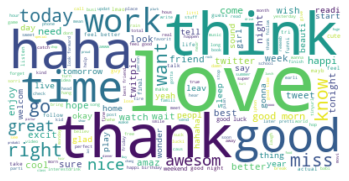

In [45]:
# Generate a word cloud image for preprocessed positive tweets
wordcloud = # private solution

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### 3. plotting word cloud for NOT-preprocessed positive tweets

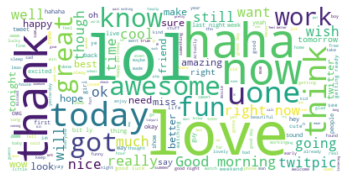

In [46]:
# Generate a word cloud image for positive tweets
wordcloud = # private solution

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### 3. plotting word cloud for preprocessed negative tweets

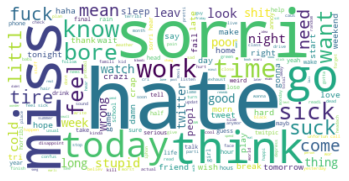

In [47]:
# Generate a word cloud image for preprocessed negative tweets
wordcloud = # private solution

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### 3. plotting word cloud for NOT-preprocessed negative tweets

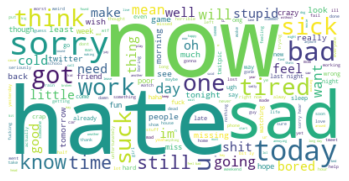

In [48]:
# Generate a word cloud image for negative tweets
wordcloud = #private solution

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### 3. plotting word cloud for preprocessed neutral tweets

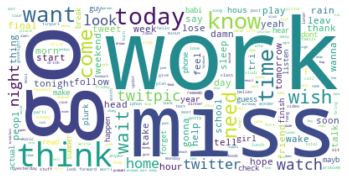

In [49]:
# Generate a word cloud image for preprocessed neutral tweets
wordcloud = # private solution

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### 3. plotting word cloud for NOT-preprocessed neutral tweets

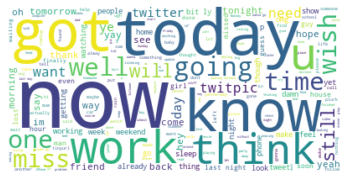

In [50]:
# Generate a word cloud image for neutral tweets
wordcloud = # private solution

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# 4
4.	Use spacy to identify the named-entities in each of the above document and draw a histogram showing the 20 most frequent named-entities in each of the three documents.

In [47]:
import spacy
# private solution


In [48]:
from collections import Counter as C

In [136]:
pos = get_pos()
neg = get_neg()
neu = get_neu()

In [137]:
def get_doc_pos():
  file_name = 'doc_pos.pkl'
  if os.path.exists(file_name):
    d = pd.read_pickle(file_name)
    return d

  try:
    pos
  except NameError:
    pos = get_pos()

  # private solution
  d.to_pickle(file_name)
  return d

In [ ]:
doc_pos = get_doc_pos()

In [139]:
def count_words(docs):
  counter = C()
  # private solution
  
  return counter

In [140]:
def get_counter_pos():
  file_name = 'get_counter_pos.dict'
  if os.path.exists(file_name):
    with open(file_name, 'rb') as f:
      c = pickle.load(f)
    return c

  try:
    doc_pos
  except NameError:
    doc_pos = get_doc_pos()
  
  c = count_words(doc_pos)
  with open(file_name, 'wb') as f:
    pickle.dump(c, f)
  return c

In [ ]:

counter_pos = count_words(doc_pos)

In [150]:
def get_doc_neg():
    file_name = 'doc_neg.pkl'
    if os.path.exists(file_name):
        return pd.read_pickle(file_name)

    try:
        neg
    except NameError:
        neg = get_neg()

    # private solution
    d.to_pickle(file_name)
    return d

In [ ]:
doc_neg = get_doc_neg()

In [149]:
def get_counter_neg():
    file_name = 'get_counter_neg.dict'
    if os.path.exists(file_name):
        with open(file_name, 'rb') as f:
            c = pickle.load(f)
        return c

    try:
        doc_neg
    except NameError:
        doc_neg = get_doc_neg()
  
    c = count_words(doc_neg)
    with open(file_name, 'wb') as f:
        pickle.dump(c, f)
    return c

In [ ]:
counter_neg = get_counter_neg()

In [143]:
def get_doc_neu():
  file_name = 'doc_neu.pkl'
  if os.path.exists(file_name):
    return pd.read_pickle(file_name)

  try:
    neg
  except NameError:
    neg = get_neu()

  # private solution
  d.to_pickle(file_name)
  return d

In [ ]:
doc_neu = get_doc_neu()

In [144]:
def get_counter_neu():
  file_name = 'get_counter_neu.dict'
  if os.path.exists(file_name):
    with open(file_name, 'rb') as f:
      c = pickle.load(f)
    return c

  try:
    doc_neu
  except NameError:
    doc_neu = get_doc_neu()
  
  c = count_words(doc_neu)
  with open(file_name, 'wb') as f:
    pickle.dump(c, f)
  return c

In [ ]:
counter_neu = get_counter_neu()

In [145]:
def get_counter_neu_ser():
  file_name = 'counter_neu_ser.pkl'
  if os.path.exists(file_name):
    return pd.read_pickle(file_name)
  
  try:
    counter_neu
  except NameError:
    counter_neu = get_counter_neu()

  # private solution
  c.to_pickle(file_name)
  return c

In [151]:
def get_counter_neg_ser():
    file_name = 'counter_neg_ser.pkl'
    if os.path.exists(file_name):
        return pd.read_pickle(file_name)
  
    try:
        counter_neg
    except NameError:
        counter_neg = get_counter_neg()

    # private solution
    c.to_pickle(file_name)
    return c

In [147]:
def get_counter_pos_ser():
  file_name = 'counter_pos_ser.pkl'
  if os.path.exists(file_name):
    return pd.read_pickle(file_name)
  
  try:
    counter_pos
  except NameError:
    counter_pos = get_counter_pos()

  # private solution
  c.to_pickle(file_name)
  return c

In [ ]:
counter_neg_ser = get_counter_neg_ser()

In [9]:
counter_pos_ser = get_counter_pos_ser()

In [10]:
counter_neu_ser = get_counter_neu_ser()

In [49]:
import matplotlib.pyplot as plt
import matplotlib

In [50]:
def get_ready_for_plot_neu():
  file_name = 'ready_for_plot_neu.pkl'
  if os.path.exists(file_name):
    s = pd.read_pickle(file_name)
    return s
  
  try:
    counter_neu_ser
  except NameError:
    counter_neu_ser = get_counter_neu_ser()

  # private solution
  s.to_pickle(file_name)
  return s

In [51]:
def get_ready_for_plot_neg():
  file_name = 'ready_for_plot_neg.pkl'
  if os.path.exists(file_name):
    s = pd.read_pickle(file_name)
    return s
  
  try:
    counter_neg_ser
  except NameError:
    counter_neg_ser = get_counter_neg_ser()

  # private solution
  s.to_pickle(file_name)
  return s

In [52]:
def get_ready_for_plot_pos():
  file_name = 'ready_for_plot_pos.pkl'
  if os.path.exists(file_name):
    s = pd.read_pickle(file_name)
    return s
  
  try:
    counter_pos_ser
  except NameError:
    counter_pos_ser = get_counter_pos_ser()

  # private solution
  s.to_pickle(file_name)
  return s

In [53]:
ready_for_plot_neg = get_ready_for_plot_neg()
ready_for_plot_pos = get_ready_for_plot_pos()

In [54]:
ready_for_plot_neu = get_ready_for_plot_neu()

In [68]:
import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams['font.size'] = 20

In [177]:
def plot_named_entities(plt_data, type_):
    plt.figure(figsize=(20,20))
    plt.bar(plt_data.index, plt_data.values)
    plt.xticks(rotation=90)
    plt.xlabel(f'20 most frequent named entities for {type_}', fontsize = 40)
    plt.ylabel('frequency', fontsize = 40)

### 4. plotting 20 most frequent named entities for neutral category

In [77]:
#plot_named_entities(ready_for_plot_neu, 'neutrals')

In [114]:
import random as r
def random_color():
    # private solution

<AxesSubplot:xlabel='20 most frequent named entities for neutrals', ylabel='Frequency'>

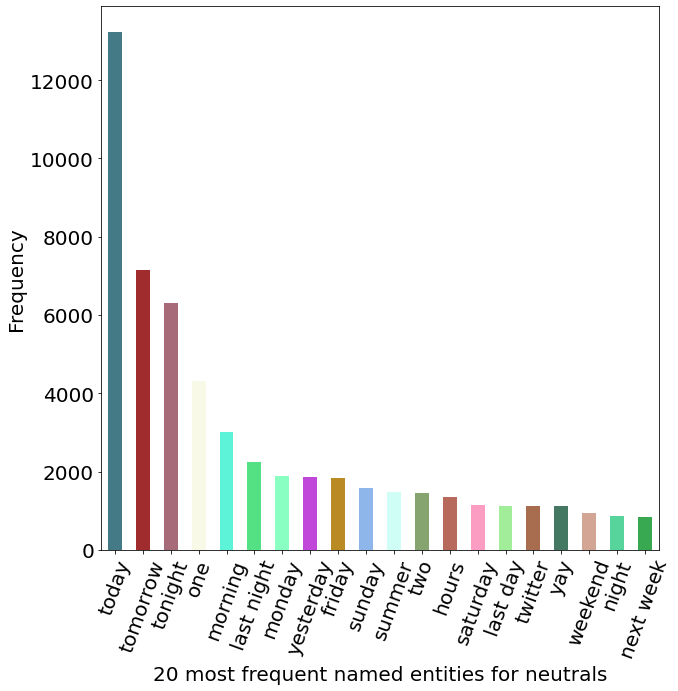

In [128]:
ready_for_plot_neu.plot.bar(color = [random_color() for _ in range(len(ready_for_plot_neu))],
                           figsize = (10, 10),
                           fontsize = 20,
                           xlabel = '20 most frequent named entities for neutrals',
                           ylabel = 'Frequency',
                           rot = 70)

<AxesSubplot:ylabel='None'>

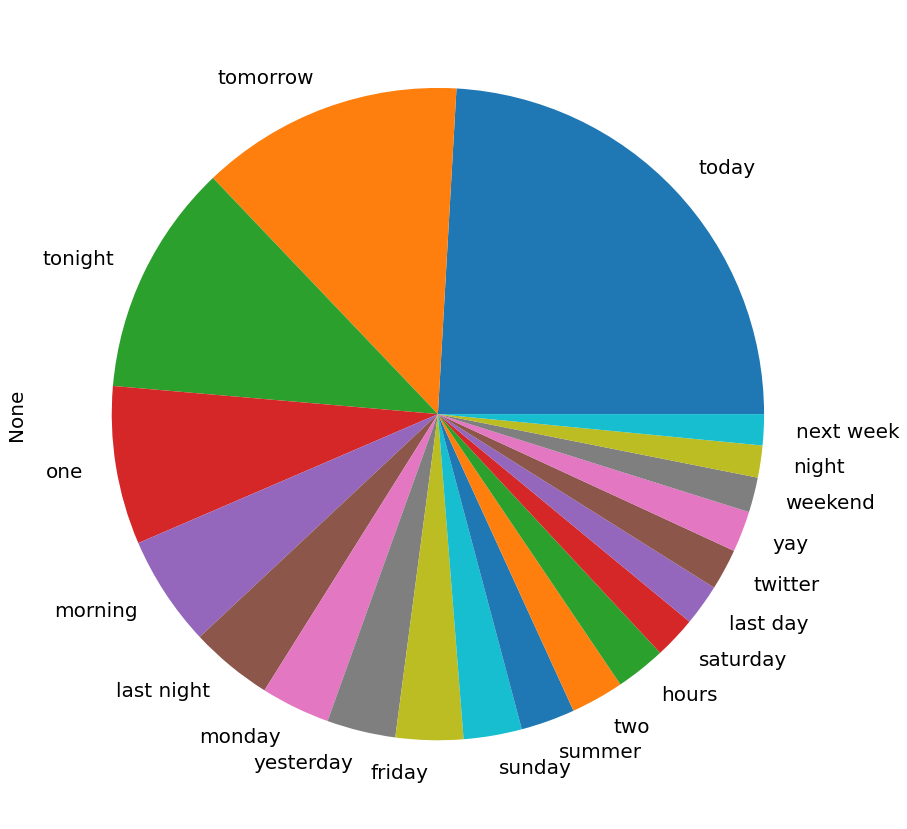

In [83]:
ready_for_plot_neu.plot.pie(figsize = (15, 15))

### 4. plotting 20 most frequent named entities for positive category

In [86]:
#plot_named_entities(ready_for_plot_pos, 'positives')

<AxesSubplot:xlabel='20 most frequent named entities for positives', ylabel='Frequency'>

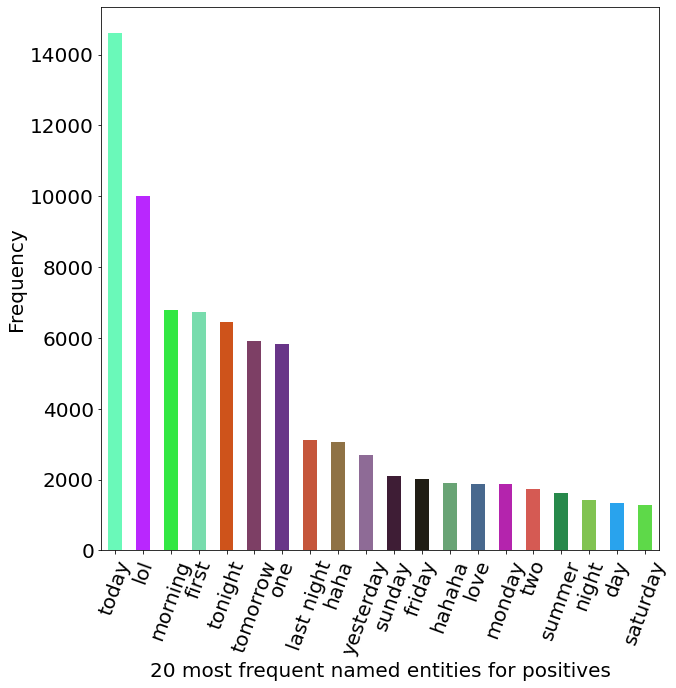

In [129]:
ready_for_plot_pos.plot.bar(color = [random_color() for _ in range(len(ready_for_plot_pos))],
                           figsize = (10, 10),
                           fontsize = 20,
                           xlabel = '20 most frequent named entities for positives',
                           ylabel = 'Frequency',
                           rot = 70)

<AxesSubplot:ylabel='None'>

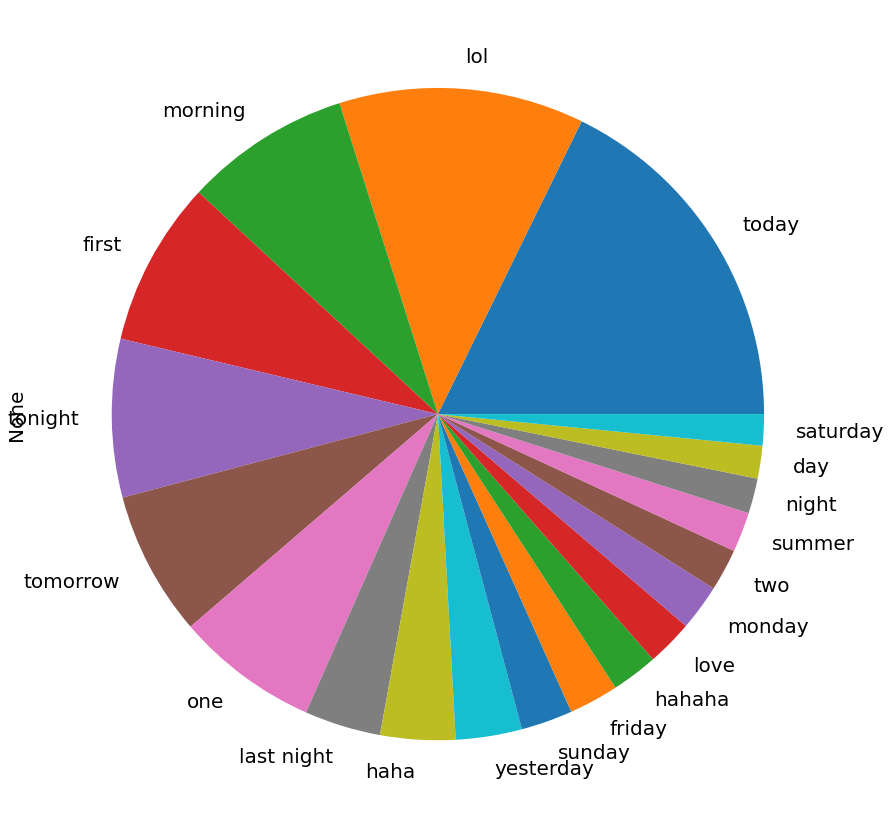

In [87]:
ready_for_plot_pos.plot.pie(figsize = (15, 15))

### 4. plotting 20 most frequent named entities for negative category

In [91]:
#plot_named_entities(ready_for_plot_neg, 'negatives')

<AxesSubplot:xlabel='20 most frequent named entities for negatives', ylabel='Frequency'>

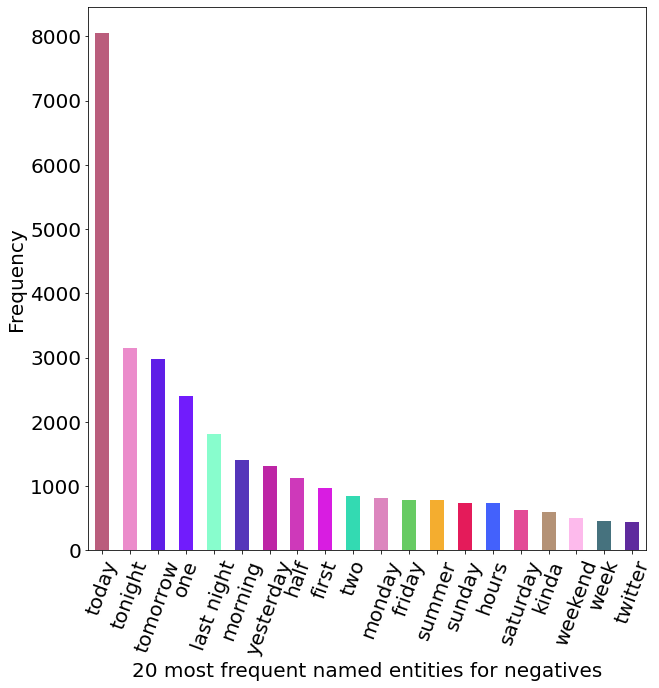

In [130]:
ready_for_plot_neg.plot.bar(color = [random_color() for _ in range(len(ready_for_plot_neg))],
                           figsize = (10, 10),
                           fontsize = 20,
                           xlabel = '20 most frequent named entities for negatives',
                           ylabel = 'Frequency',
                           rot = 70)

<AxesSubplot:ylabel='None'>

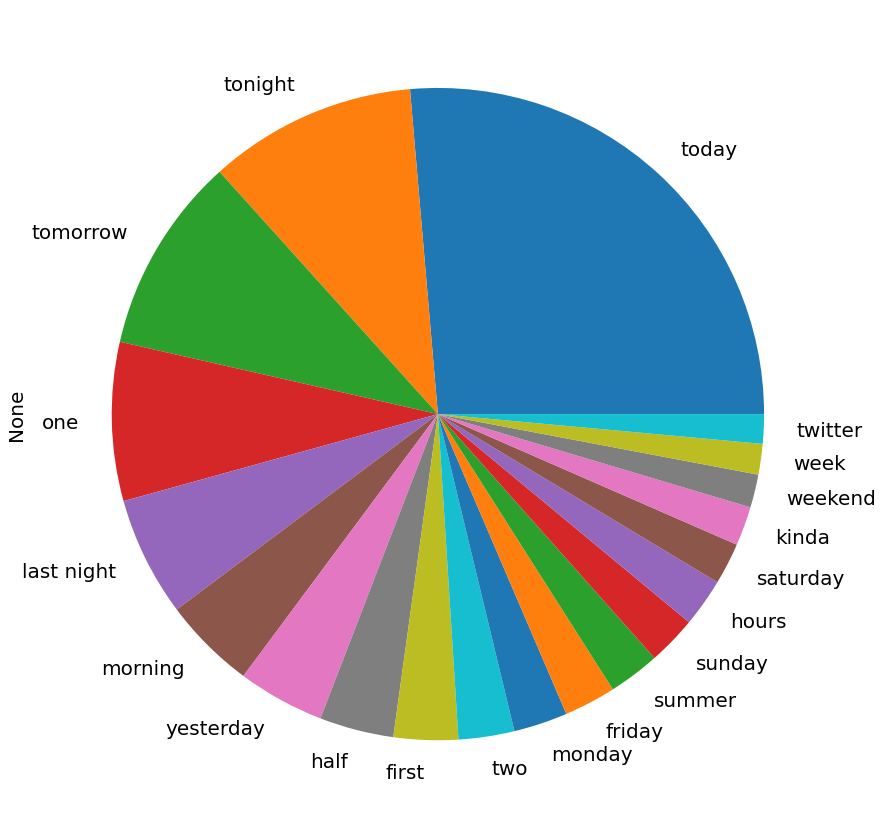

In [92]:
ready_for_plot_neg.plot.pie(figsize = (15, 15))

# 5
5.	Consider the term “Brexit”, and consider a window size of three on left and right hand side. Suggest a script that outputs the 20 most co-occurring words with Brexit at window size 7 (three on left and three on right) in each of the three documents. Represent the outcome as a histogram.

In [97]:
from gensim.models import Word2Vec
from nltk.corpus import brown
import gensim

import pandas as pd

In [104]:
def get_uncleaned_tweets():
  file_name = 'uncleaned_tweets.pkl'
  if os.path.exists(file_name):
    return pd.read_pickle(file_name)

  with zipfile.ZipFile('brexit_data_project_BDD-kaggle.zip') as z:    
    with z.open('tweet.brut.txt') as f:
      uncleaned_tweets = pd.read_csv(f, names = ['Tweet'])  


  # private solution

  uncleaned_tweets.to_pickle('uncleaned_tweets.pkl')
  return uncleaned_tweets

In [ ]:
uncleaned_tweets = get_uncleaned_tweets()

In [22]:
pos = get_pos()
neg = get_neg()
neu = get_neu()

In [23]:
def pre_process(tweet):
    # private solution

In [53]:
def get_uncleaned_tweets_pos_preprocessed():
  file_name = 'uncleaned_tweets_pos_preprocessed'
  if os.path.exists(file_name):
    return pd.read_pickle(file_name)

  try:
    pos
  except NameError:
    pos = get_pos()

  # private solution
  s.to_pickle(file_name)
  return s

In [54]:
def get_uncleaned_tweets_neg_preprocessed():
  file_name = 'uncleaned_tweets_neg_preprocessed'
  if os.path.exists(file_name):
    return pd.read_pickle(file_name)

  try:
    neg
  except NameError:
    neg = get_neg()

  # private solution
  s.to_pickle(file_name)
  return s

In [55]:
def get_uncleaned_tweets_neu_preprocessed():
  file_name = 'uncleaned_tweets_neu_preprocessed'
  if os.path.exists(file_name):
    return pd.read_pickle(file_name)

  try:
    neu
  except NameError:
    neu = get_neu()

  # private solution
  s.to_pickle(file_name)
  return s

In [27]:
uncleaned_tweets_pos_preprocessed = get_uncleaned_tweets_pos_preprocessed()
uncleaned_tweets_neg_preprocessed = get_uncleaned_tweets_neg_preprocessed()
uncleaned_tweets_neu_preprocessed = get_uncleaned_tweets_neu_preprocessed()

In [93]:
def get_model_pos():
  file_name = 'model_pos.model'
  if os.path.exists(file_name):
    return gensim.models.Word2Vec.load(file_name)

  try:
    uncleaned_tweets_pos_preprocessed
  except NameError:
    uncleaned_tweets_pos_preprocessed = get_uncleaned_tweets_pos_preprocessed()

  # private solution
  m.save(file_name)
  return m

In [98]:
model_pos = get_model_pos()

In [94]:
def get_model_neg():
  file_name = 'model_neg.model'
  if os.path.exists(file_name):
    return gensim.models.Word2Vec.load(file_name)

  try:
    uncleaned_tweets_neg_preprocessed
  except NameError:
    uncleaned_tweets_neg_preprocessed = get_uncleaned_tweets_neg_preprocessed()

  # private solution
  m.save(file_name)
  return m

In [99]:
model_neg = get_model_neg()

In [95]:
def get_model_neu():
  file_name = 'model_neu.model'
  if os.path.exists(file_name):
    return gensim.models.Word2Vec.load(file_name)

  try:
    uncleaned_tweets_neu_preprocessed
  except NameError:
    uncleaned_tweets_neu_preprocessed = get_uncleaned_tweets_neu_preprocessed()

  # private solution
  m.save(file_name)
  return m

In [100]:
model_neu = get_model_neu()

In [102]:
r = model_pos.wv.most_similar('brexit', topn = 20)
most_20_pos_df = pd.DataFrame(r, columns = ['word', 'freq'])

In [103]:
r = model_neu.wv.most_similar('brexit', topn = 20)
most_20_neu_df = pd.DataFrame(r, columns = ['word', 'freq'])

In [104]:
r = model_neg.wv.most_similar('brexit', topn = 20)
most_20_neg_df = pd.DataFrame(r, columns = ['word', 'freq'])

In [38]:
import matplotlib
matplotlib.rcParams['font.size'] = 30
def plot_brexit_coref(plt_df, cat_label):
    plt.figure(figsize=(20,20))
    plt.bar(plt_df.word, plt_df.freq)
    plt.xticks(rotation=90)
    plt.xlabel(
        f'20 most co-occurring words with Brexit at window size 7 for {cat_label} category',
        fontsize = 40)
    plt.ylabel('Frequency', fontsize = 40)

### 5. plotting the result

<AxesSubplot:xlabel='20 most co-occurring words with Brexit at window size 7 for neutral category', ylabel='Frequency'>

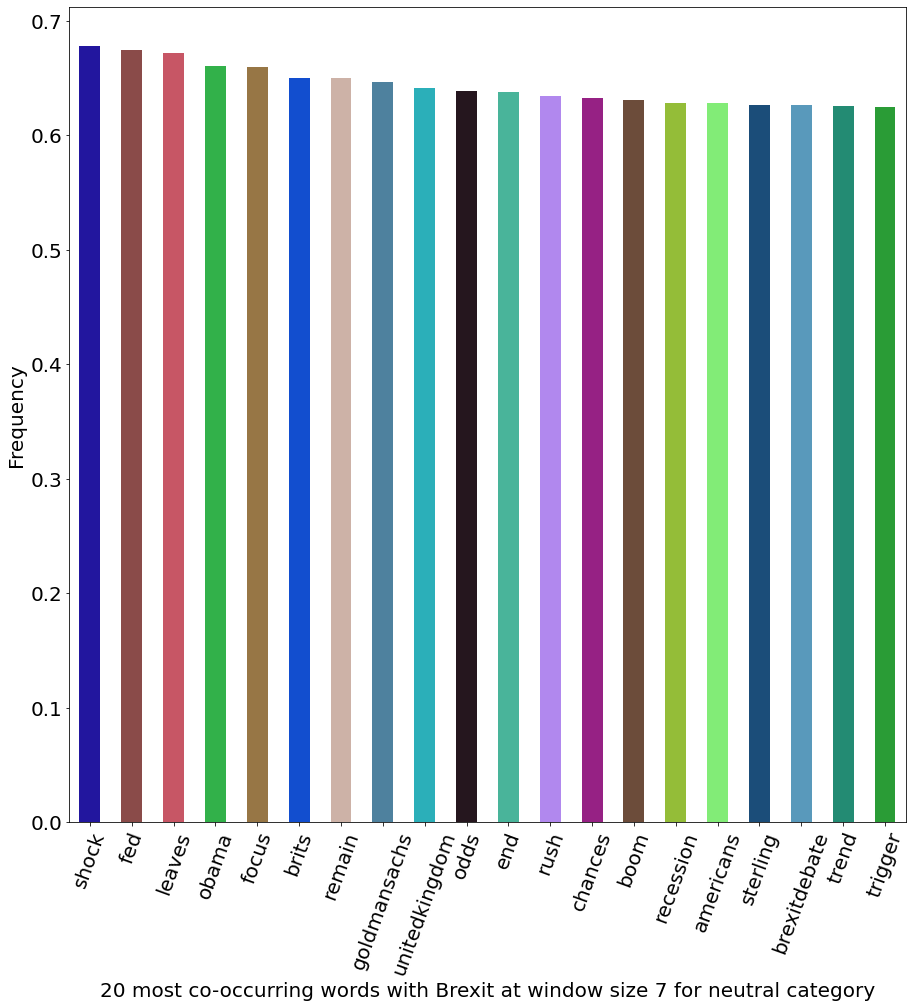

In [121]:
most_20_neu_df.plot.bar(x = 'word', y = 'freq', legend = False,
                        figsize = (15, 15),
                        color = [random_color() for _ in range(len(most_20_neu_df))],
                        xlabel = '20 most co-occurring words with Brexit at window size 7 for neutral category', 
                        ylabel = 'Frequency',
                        rot = 70)

<AxesSubplot:xlabel='20 most co-occurring words with Brexit at window size 7 for negative category', ylabel='Frequency'>

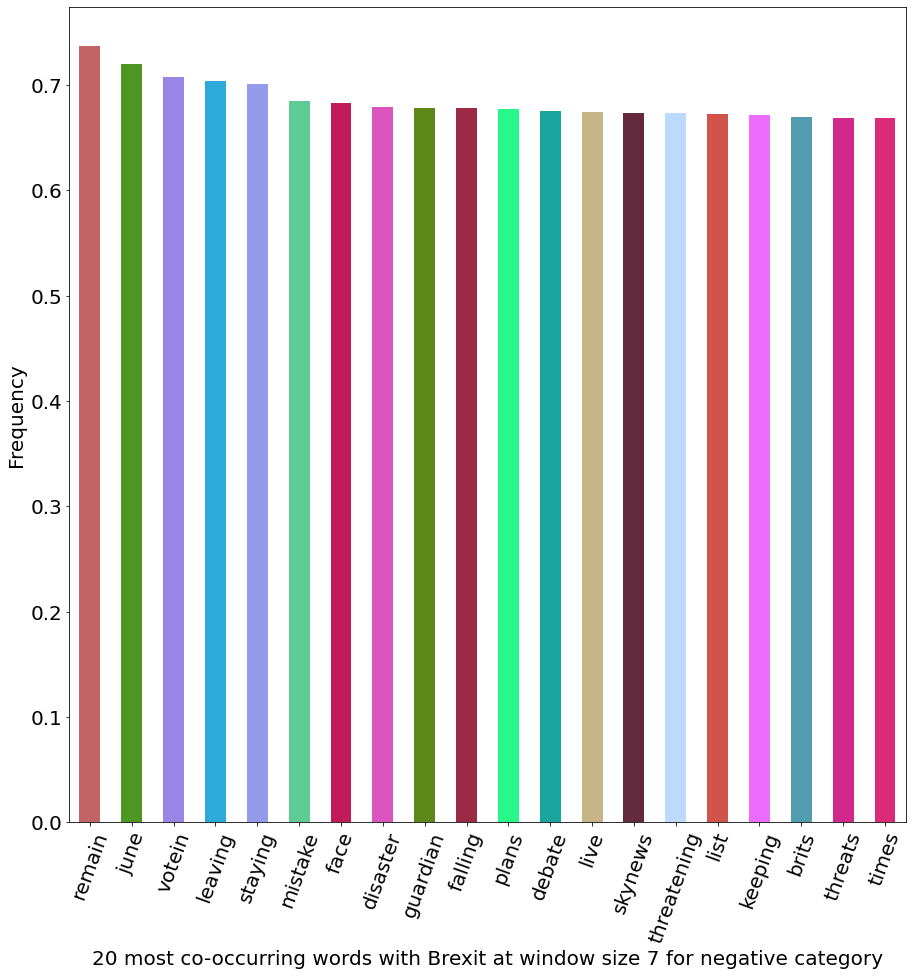

In [122]:
most_20_neg_df.plot.bar(x = 'word', y = 'freq', legend = False,
                        figsize = (15, 15),
                        color = [random_color() for _ in range(len(most_20_neg_df))],
                        xlabel = '20 most co-occurring words with Brexit at window size 7 for negative category', 
                        ylabel = 'Frequency',
                        rot = 70)

<AxesSubplot:xlabel='20 most co-occurring words with Brexit at window size 7 for positive category', ylabel='Frequency'>

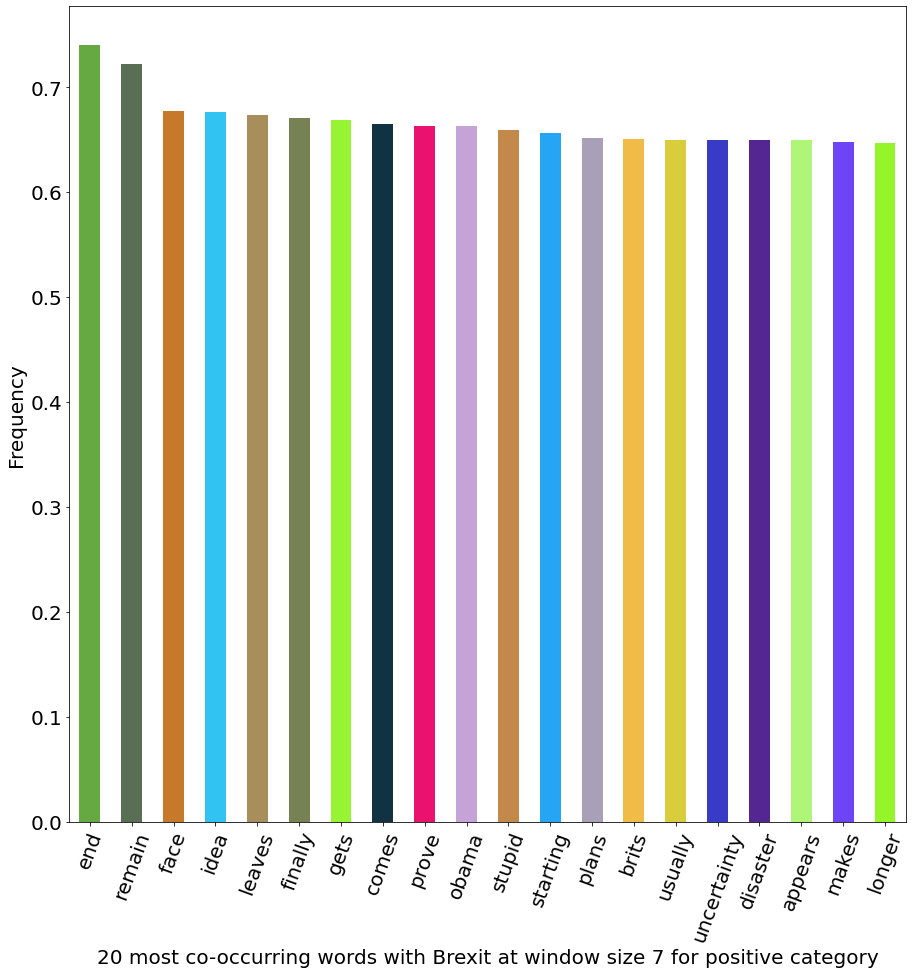

In [123]:
most_20_pos_df.plot.bar(x = 'word', y = 'freq', legend = False,
                        figsize = (15, 15),
                        color = [random_color() for _ in range(len(most_20_pos_df))],
                        xlabel = '20 most co-occurring words with Brexit at window size 7 for positive category', 
                        ylabel = 'Frequency',
                        rot = 70)

# 6
6.	Run empath client https://github.com/Ejhfast/empath-client on each of the three documents and report categories which have no zero-value.  Discuss the potential overlapping between LDA results and empath client results.

In [ ]:
# !pip install empath -- UNCOMMENT FOR COLAB


In [90]:
from empath import Empath
# private solution


In [56]:
uncleaned_tweets_pos_preprocessed = get_uncleaned_tweets_pos_preprocessed()
uncleaned_tweets_neg_preprocessed = get_uncleaned_tweets_neg_preprocessed()
uncleaned_tweets_neu_preprocessed = get_uncleaned_tweets_neu_preprocessed()


In [4]:
def get_empath_uncleaned_tweets_pos_preprocessed():
  file_name = 'get_empath_uncleaned_tweets_pos_preprocessed.pkl'
  if os.path.exists(file_name):
    return pd.read_pickle(file_name)

  try:
    uncleaned_tweets_pos_preprocessed
  except NameError:
    uncleaned_tweets_pos_preprocessed = get_uncleaned_tweets_pos_preprocessed()

  # private solution
  s.to_pickle(file_name)
  return s

In [5]:
def get_empath_uncleaned_tweets_neg_preprocessed():
  file_name = 'get_empath_uncleaned_tweets_neg_preprocessed.pkl'
  if os.path.exists(file_name):
    return pd.read_pickle(file_name)

  try:
    uncleaned_tweets_neg_preprocessed
  except NameError:
    uncleaned_tweets_neg_preprocessed = get_uncleaned_tweets_neg_preprocessed()

  # private solution
  s.to_pickle(file_name)
  return s

In [6]:
def get_empath_uncleaned_tweets_neu_preprocessed():
  file_name = 'get_empath_uncleaned_tweets_neu_preprocessed.pkl'
  if os.path.exists(file_name):
    return pd.read_pickle(file_name)

  try:
    uncleaned_tweets_neu_preprocessed
  except NameError:
    uncleaned_tweets_neu_preprocessed = get_uncleaned_tweets_neu_preprocessed()

  # private solution
  s.to_pickle(file_name)
  return s

In [60]:
empath_uncleaned_tweets_pos_preprocessed = get_empath_uncleaned_tweets_pos_preprocessed()
empath_uncleaned_tweets_neg_preprocessed = get_empath_uncleaned_tweets_neg_preprocessed()
empath_uncleaned_tweets_neu_preprocessed = get_empath_uncleaned_tweets_neu_preprocessed()

In [89]:
def infer_cat(df):
    # private solution

In [8]:
def get_infered_cat_pos():
  file_name = 'infered_cat_pos.set'
  if os.path.exists(file_name):
    with open(file_name, 'rb') as f:
      c = pickle.load(f)
    return c
  
  try:
    empath_uncleaned_tweets_pos_preprocessed
  except NameError:
    empath_uncleaned_tweets_pos_preprocessed = get_empath_uncleaned_tweets_pos_preprocessed()

  c = infer_cat(empath_uncleaned_tweets_pos_preprocessed)
  with open(file_name, 'wb') as f:
    pickle.dump(c, f)
  return c

In [9]:
def get_infered_cat_neg():
  file_name = 'infered_cat_neg.set'
  if os.path.exists(file_name):
    with open(file_name, 'rb') as f:
      c = pickle.load(f)
    return c
  
  try:
    empath_uncleaned_tweets_neg_preprocessed
  except NameError:
    empath_uncleaned_tweets_neg_preprocessed = get_empath_uncleaned_tweets_neg_preprocessed()

  c = infer_cat(empath_uncleaned_tweets_neg_preprocessed)
  with open(file_name, 'wb') as f:
    pickle.dump(c, f)
  return c

In [10]:
def get_infered_cat_neu():
  file_name = 'infered_cat_neu.set'
  if os.path.exists(file_name):
    with open(file_name, 'rb') as f:
      c = pickle.load(f)
    return c
  
  try:
    empath_uncleaned_tweets_neu_preprocessed
  except NameError:
    empath_uncleaned_tweets_neu_preprocessed = get_empath_uncleaned_tweets_neu_preprocessed()

  c = infer_cat(empath_uncleaned_tweets_neu_preprocessed)
  with open(file_name, 'wb') as f:
    pickle.dump(c, f)
  return c

In [11]:
infered_cat_pos = get_infered_cat_pos()
infered_cat_neg = get_infered_cat_neg()
infered_cat_neu = get_infered_cat_neu()

### 6. showing the non-zero-valued topic categories for positive tweets

In [12]:
infered_cat_pos

{'achievement',
 'affection',
 'aggression',
 'air_travel',
 'alcohol',
 'ancient',
 'anger',
 'animal',
 'anonymity',
 'anticipation',
 'appearance',
 'art',
 'attractive',
 'banking',
 'beach',
 'beauty',
 'blue_collar_job',
 'body',
 'breaking',
 'business',
 'car',
 'celebration',
 'cheerfulness',
 'childish',
 'children',
 'cleaning',
 'clothing',
 'cold',
 'college',
 'communication',
 'competing',
 'computer',
 'confusion',
 'contentment',
 'cooking',
 'crime',
 'dance',
 'death',
 'deception',
 'disappointment',
 'disgust',
 'dispute',
 'divine',
 'domestic_work',
 'dominant_heirarchical',
 'dominant_personality',
 'driving',
 'eating',
 'economics',
 'emotional',
 'envy',
 'exasperation',
 'exercise',
 'exotic',
 'fabric',
 'family',
 'farming',
 'fashion',
 'fear',
 'feminine',
 'fight',
 'fire',
 'friends',
 'fun',
 'furniture',
 'gain',
 'giving',
 'government',
 'hate',
 'healing',
 'health',
 'hearing',
 'help',
 'heroic',
 'hiking',
 'hipster',
 'home',
 'horror',
 'hygi

### 6. showing the non-zero-valued topic categories for negative tweets

In [13]:
infered_cat_neg

{'achievement',
 'affection',
 'aggression',
 'air_travel',
 'alcohol',
 'ancient',
 'anger',
 'animal',
 'anonymity',
 'anticipation',
 'appearance',
 'art',
 'attractive',
 'banking',
 'beach',
 'beauty',
 'blue_collar_job',
 'body',
 'breaking',
 'business',
 'car',
 'celebration',
 'cheerfulness',
 'childish',
 'children',
 'cleaning',
 'clothing',
 'cold',
 'college',
 'communication',
 'competing',
 'computer',
 'confusion',
 'contentment',
 'cooking',
 'crime',
 'dance',
 'death',
 'deception',
 'disappointment',
 'disgust',
 'dispute',
 'divine',
 'domestic_work',
 'dominant_heirarchical',
 'dominant_personality',
 'driving',
 'eating',
 'economics',
 'emotional',
 'envy',
 'exasperation',
 'exercise',
 'exotic',
 'fabric',
 'family',
 'farming',
 'fashion',
 'fear',
 'feminine',
 'fight',
 'fire',
 'friends',
 'fun',
 'furniture',
 'gain',
 'giving',
 'government',
 'hate',
 'healing',
 'health',
 'hearing',
 'help',
 'heroic',
 'hiking',
 'hipster',
 'home',
 'horror',
 'hygi

### 6. showing the non-zero-valued topic categories for neutral tweets

In [14]:
infered_cat_neu

{'achievement',
 'affection',
 'aggression',
 'air_travel',
 'alcohol',
 'ancient',
 'anger',
 'animal',
 'anonymity',
 'anticipation',
 'appearance',
 'art',
 'attractive',
 'banking',
 'beach',
 'beauty',
 'blue_collar_job',
 'body',
 'breaking',
 'business',
 'car',
 'celebration',
 'cheerfulness',
 'childish',
 'children',
 'cleaning',
 'clothing',
 'cold',
 'college',
 'communication',
 'competing',
 'computer',
 'confusion',
 'contentment',
 'cooking',
 'crime',
 'dance',
 'death',
 'deception',
 'disappointment',
 'disgust',
 'dispute',
 'divine',
 'domestic_work',
 'dominant_heirarchical',
 'dominant_personality',
 'driving',
 'eating',
 'economics',
 'emotional',
 'envy',
 'exasperation',
 'exercise',
 'exotic',
 'fabric',
 'family',
 'farming',
 'fashion',
 'fear',
 'feminine',
 'fight',
 'fire',
 'friends',
 'fun',
 'furniture',
 'gain',
 'giving',
 'government',
 'hate',
 'healing',
 'health',
 'hearing',
 'help',
 'heroic',
 'hiking',
 'hipster',
 'home',
 'horror',
 'hygi

### 6. showing the overlapping results between LDA (using TFIDF) and Empath for positive category

In [101]:
get_lda_tfidf_model_set_of_topics()['pos'] & infered_cat_pos

{'love', 'night', 'sound', 'work'}

### 6. showing the overlapping results between LDA (using BoW) and Empath for positive category

In [102]:
get_lda_BoW_model_set_of_topics()['pos'] & infered_cat_pos

{'help',
 'home',
 'listen',
 'love',
 'music',
 'night',
 'play',
 'school',
 'sleep',
 'work'}

### 6. showing the overlapping results between LDA (using TFIDF) and Empath for negative category

In [103]:
get_lda_tfidf_model_set_of_topics()['neg'] & infered_cat_neg

{'cold', 'hate', 'love', 'night', 'phone', 'poor', 'sleep', 'work'}

### 6. showing the overlapping results between LDA (using BoW) and Empath for negative category

In [104]:
get_lda_BoW_model_set_of_topics()['neg'] & infered_cat_neg

{'cold',
 'hate',
 'home',
 'love',
 'night',
 'phone',
 'play',
 'poor',
 'school',
 'sleep',
 'work'}

### 6. showing the overlapping results between LDA (using TFIDF) and Empath for neutral category

In [105]:
get_lda_tfidf_model_set_of_topics()['neu'] & infered_cat_neu

{'beach',
 'home',
 'listen',
 'music',
 'night',
 'phone',
 'school',
 'sleep',
 'work'}

### 6. showing the overlapping results between LDA (using BoW) and Empath for neutral category

In [106]:
get_lda_BoW_model_set_of_topics()['neu'] & infered_cat_neu

{'beach',
 'help',
 'home',
 'listen',
 'music',
 'night',
 'play',
 'school',
 'sleep',
 'work'}

# 7
7.	Now we would like to comprehend the public opinion in terms like, hate, trying to understand what user like / support and what they hate / dislike in each class. For this purpose, use wordnet to suggest a set of keywords semantically related to “hate” and a set of keywords semantically related to “like”. Write a script, which similarly to 5) identifies the list of word that co-occur with one of the keywords of hate (resp. like), at window size 7 and output the histogram of the 30 most co-occurring words for hate and 30 most co-occurring words for like, in each of the three documents. Suggest a manual categorization of these keywords in a way to ease explanation of the outcomes.

In [132]:
from nltk.corpus import wordnet as wn

In [133]:
def get_syn(word):
    # private solution

In [134]:
syns_for_like = get_syn('like')
syns_for_hate = get_syn('hate')

### 7. showing words that are semantically related to like

In [135]:
syns_for_like = syns_for_like - { 'the_like', 'the_likes_of', 'same'}
syns_for_like

{'alike',
 'care',
 'comparable',
 'corresponding',
 'ilk',
 'like',
 'similar',
 'wish'}

### 7. showing words that are semantically related to hate

In [136]:
syns_for_hate

{'detest', 'hate', 'hatred'}

In [137]:
model_neg = get_model_neg()
model_pos = get_model_pos()
model_neu = get_model_neu()

In [138]:
hate_co_occuring_words_neg_df = pd.concat(
    [pd.DataFrame(model_neg.wv.most_similar(word, topn = 20), columns = ['word', 'freq'])
    for word in syns_for_hate],
    ignore_index = True
)

In [139]:
most_30_hate_co_occuring_words_neg_df = hate_co_occuring_words_neg_df.sort_values(by = 'freq', ascending = False).head(30)

### 7. showing 30 most co-occuring words at window size 7 for all the words related to 'hate' for negative category

In [81]:
most_30_hate_co_occuring_words_neg_df

,word,freq
40,bribed,0.946942
41,morphed,0.943935
42,challenging,0.939259
20,racists,0.936500
43,slap,0.934400
44,amused,0.933761
45,hunting,0.933529
46,bout,0.933171
47,confident,0.931725
48,zacgoldsmith,0.930776


In [140]:
hate_co_occuring_words_neu_df = pd.concat(
    [pd.DataFrame(model_neu.wv.most_similar(word, topn = 20), columns = ['word', 'freq'])
    for word in syns_for_hate],
    ignore_index = True
)

In [141]:
most_30_hate_co_occuring_words_neu_df = hate_co_occuring_words_neu_df.sort_values(by = 'freq', ascending = False).head(30)

### 7. showing 30 most co-occuring words at window size 7 for all the words related to 'hate' for neutral category

In [79]:
most_30_hate_co_occuring_words_neu_df

,word,freq
20,constant,0.925573
21,rhetoric,0.925357
22,pointing,0.923010
23,xenophobic,0.912010
24,racists,0.910377
25,hypocrites,0.908262
26,pieces,0.907586
27,resort,0.906804
28,hysteria,0.903413
29,known,0.903105


In [142]:
hate_co_occuring_words_pos_df = pd.concat(
    [pd.DataFrame(model_pos.wv.most_similar(word, topn = 20), columns = ['word', 'freq'])
    for word in syns_for_hate],
    ignore_index = True
)

In [143]:
most_30_hate_co_occuring_words_pos_df = hate_co_occuring_words_pos_df.sort_values(by = 'freq', ascending = False).head(30)

### 7. showing 30 most co-occuring words at window size 7 for all the words related to 'hate' for positive category

In [77]:
most_30_hate_co_occuring_words_pos_df

,word,freq
20,xenophobic,0.906913
21,racists,0.892852
22,rhetoric,0.890778
40,rabbit,0.884850
41,snr,0.873051
42,conquer,0.868874
43,hardy,0.865003
44,belive,0.864638
45,undone,0.863643
46,bellends,0.862842


In [144]:
like_co_occuring_words_pos_df = pd.concat(
    [pd.DataFrame(model_pos.wv.most_similar(word, topn = 20), columns = ['word', 'freq'])
    for word in syns_for_like],
    ignore_index = True
)

In [145]:
most_30_like_co_occuring_words_pos_df = like_co_occuring_words_pos_df.sort_values(by = 'freq', ascending = False).head(30)

### 7. showing 30 most co-occuring words at window size 7 for all the words related to 'like' for positive category

In [75]:
most_30_like_co_occuring_words_pos_df

,word,freq
40,recognised,0.935770
41,inept,0.933989
42,nod,0.931512
43,tin,0.929202
44,parent,0.928417
45,muppetv,0.928254
46,clinical,0.927817
47,campaigned,0.927547
48,acknowledged,0.927318
49,davidhadley,0.927073


In [146]:
like_co_occuring_words_neg_df = pd.concat(
    [pd.DataFrame(model_neg.wv.most_similar(word, topn = 20), columns = ['word', 'freq'])
    for word in syns_for_like],
    ignore_index = True
)

In [147]:
most_30_like_co_occuring_words_neg_df = like_co_occuring_words_neg_df.sort_values(by = 'freq', ascending = False).head(30)

### 7. showing 30 most co-occuring words at window size 7 for all the words related to 'like' for negative category

In [73]:
most_30_like_co_occuring_words_neg_df

,word,freq
40,toilet,0.980234
41,sorting,0.979692
42,importance,0.979434
43,jumped,0.979205
44,maintain,0.979189
45,plague,0.978102
46,beer,0.977103
47,numpty,0.976848
48,sj_powell,0.976289
49,realize,0.975383


In [148]:
like_co_occuring_words_neu_df = pd.concat(
    [pd.DataFrame(model_neu.wv.most_similar(word, topn = 20), columns = ['word', 'freq'])
    for word in syns_for_like],
    ignore_index = True
)

In [149]:
most_30_like_co_occuring_words_neu_df = like_co_occuring_words_neu_df.sort_values(by = 'freq', ascending = False).head(30)

### 7. showing 30 most co-occuring words at window size 7 for all the words related to 'like' for neu category

In [71]:
most_30_like_co_occuring_words_neu_df

,word,freq
100,gave,0.949320
40,haters,0.946307
41,whiff,0.945514
42,jingoistic,0.945280
43,journo,0.944313
44,contrast,0.944227
45,tent,0.943778
140,maybe,0.941385
46,merchant,0.941257
47,junction,0.940032


In [85]:
import matplotlib
matplotlib.rcParams['font.size'] = 30
def plot_30_most_hate_like_co_occuring(plt_df, word, cat_label):
    plt.figure(figsize=(20,20))
    plt.bar(plt_df.word, plt_df.freq)
    plt.xticks(rotation=90)
    plt.xlabel(
        f'30 most co-occurring words with "{word}" synonyms at window size 7 for "{cat_label}" category',
        fontsize = 40)
    plt.ylabel('Frequency', fontsize = 40)

### 7. plotting the results

<AxesSubplot:xlabel='30 most co-occurring words with "like" synonyms at window size 7 for "neutral" category', ylabel='Frequency'>

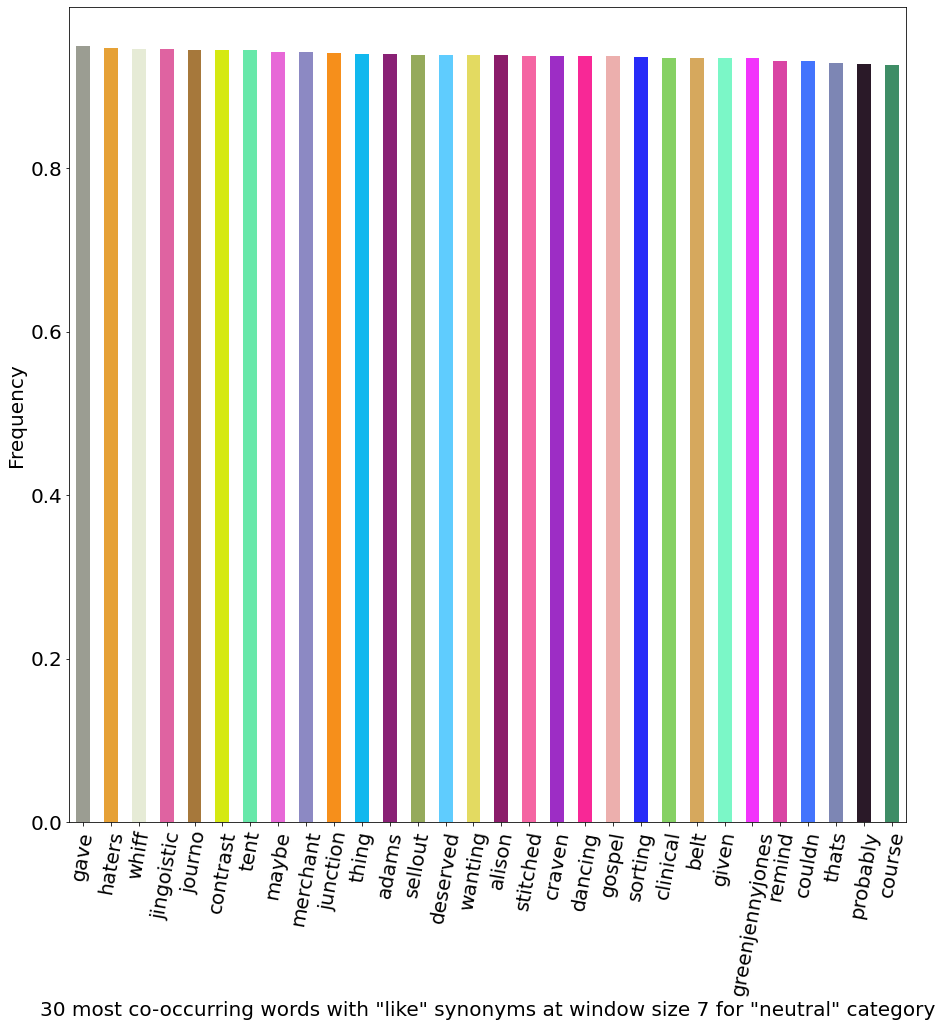

In [156]:
most_30_like_co_occuring_words_neu_df.plot.bar(x = 'word', y = 'freq',
      figsize = (15, 15),
      legend = False,
      rot = 80,
      ylabel = 'Frequency',
      xlabel = '30 most co-occurring words with "like" synonyms at window size 7 for "neutral" category',
      color = [random_color() for _ in range(len(most_30_like_co_occuring_words_neu_df))])

In [157]:
#plot_30_most_hate_like_co_occuring(most_30_like_co_occuring_words_neu_df, 'like', 'Neutral')

<AxesSubplot:xlabel='30 most co-occurring words with "like" synonyms at window size 7 for "negative" category', ylabel='Frequency'>

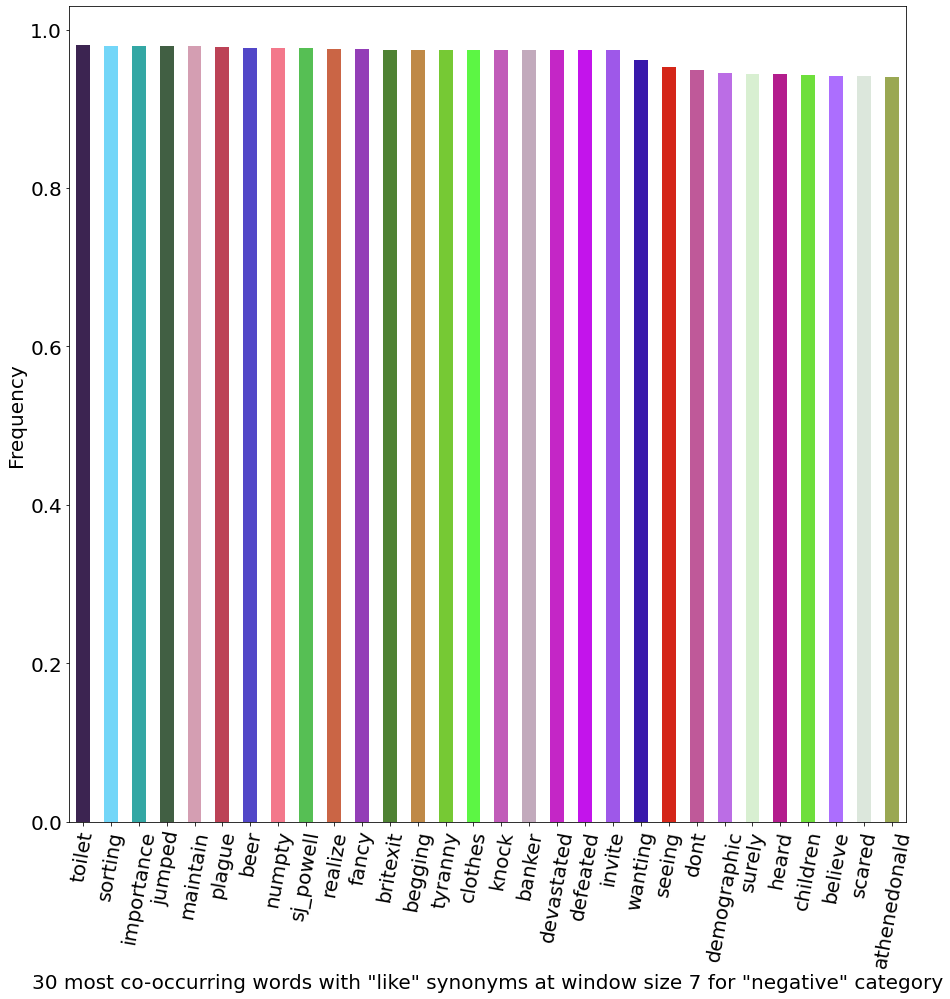

In [158]:
most_30_like_co_occuring_words_neg_df.plot.bar(x = 'word', y = 'freq',
      figsize = (15, 15),
      legend = False,
      rot = 80,
      ylabel = 'Frequency',
      xlabel = '30 most co-occurring words with "like" synonyms at window size 7 for "negative" category',
      color = [random_color() for _ in range(len(most_30_like_co_occuring_words_neg_df))])

In [159]:
#plot_30_most_hate_like_co_occuring(most_30_like_co_occuring_words_neg_df, 'like', 'Negative')

<AxesSubplot:xlabel='30 most co-occurring words with "like" synonyms at window size 7 for "positive" category', ylabel='Frequency'>

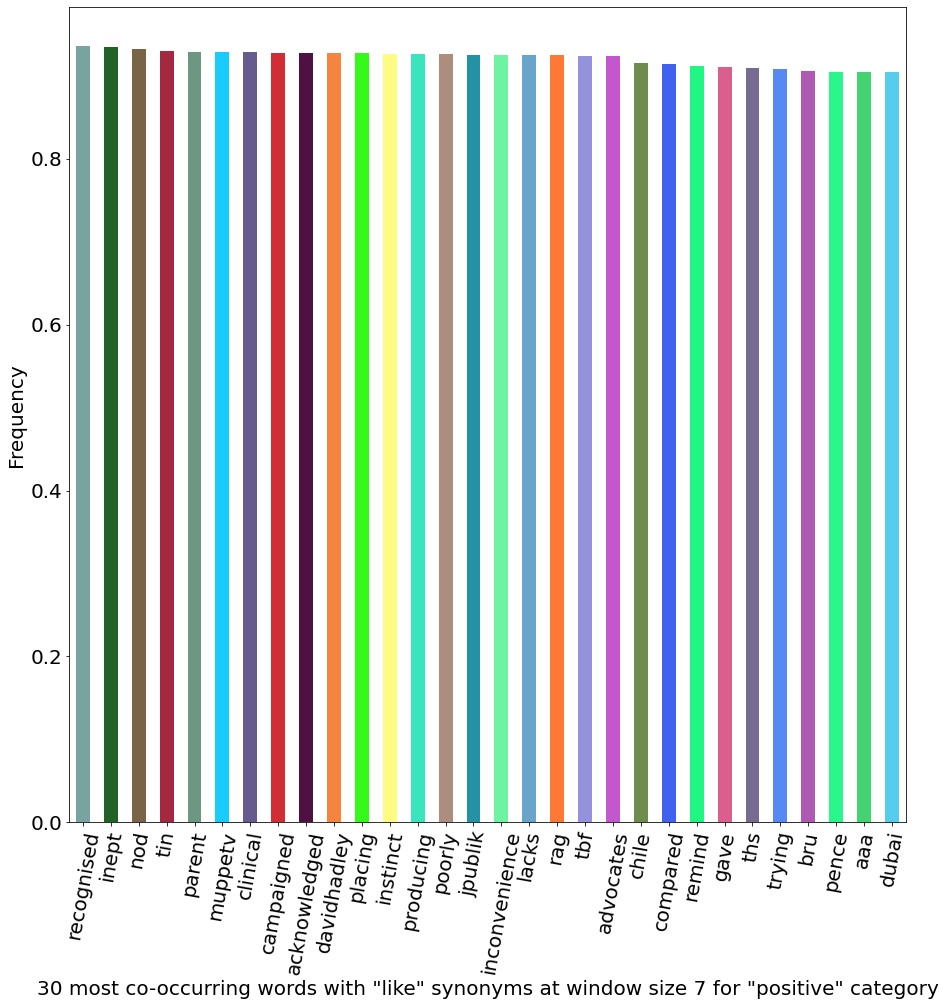

In [160]:
most_30_like_co_occuring_words_pos_df.plot.bar(x = 'word', y = 'freq',
      figsize = (15, 15),
      legend = False,
      rot = 80,
      ylabel = 'Frequency',
      xlabel = '30 most co-occurring words with "like" synonyms at window size 7 for "positive" category',
      color = [random_color() for _ in range(len(most_30_like_co_occuring_words_pos_df))])

In [161]:
#plot_30_most_hate_like_co_occuring(most_30_like_co_occuring_words_pos_df, 'like', 'Positive')

<AxesSubplot:xlabel='30 most co-occurring words with "hate" synonyms at window size 7 for "neutral" category', ylabel='Frequency'>

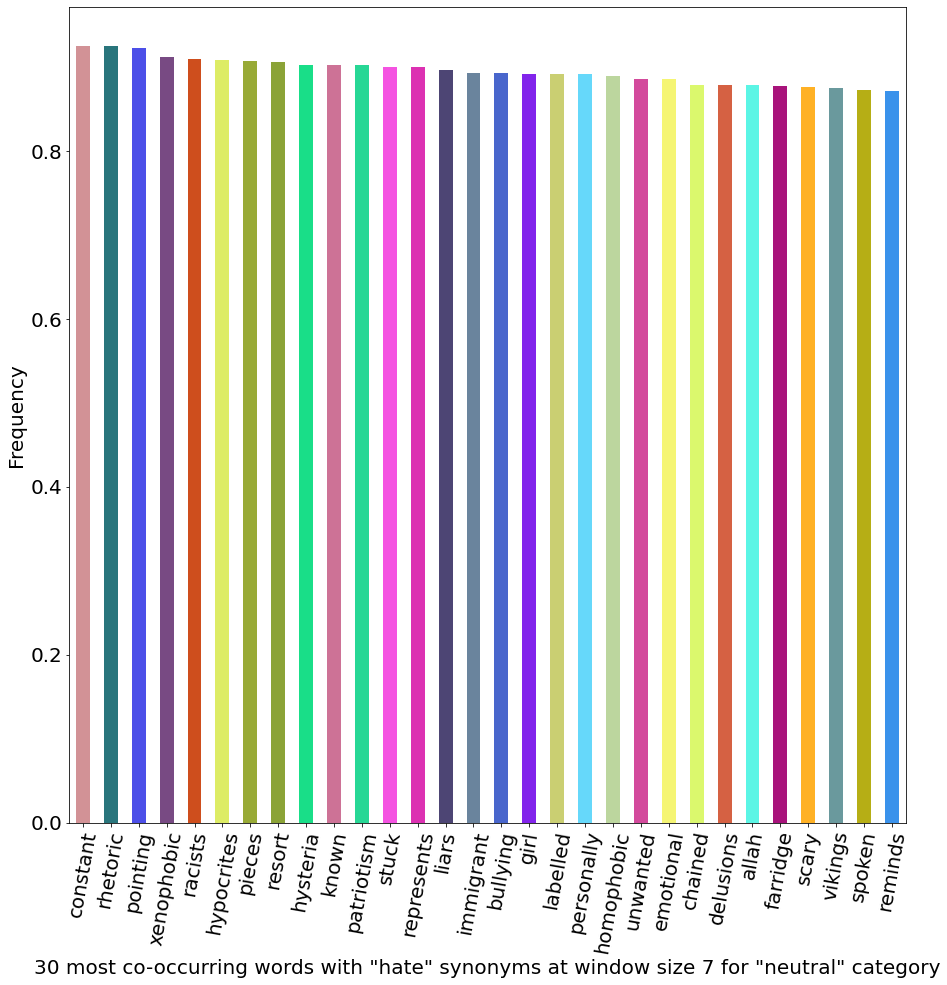

In [162]:
most_30_hate_co_occuring_words_neu_df.plot.bar(x = 'word', y = 'freq',
      figsize = (15, 15),
      legend = False,
      rot = 80,
      ylabel = 'Frequency',
      xlabel = '30 most co-occurring words with "hate" synonyms at window size 7 for "neutral" category',
      color = [random_color() for _ in range(len(most_30_hate_co_occuring_words_neu_df))])

In [163]:
#plot_30_most_hate_like_co_occuring(most_30_hate_co_occuring_words_neu_df, 'hate', 'Neutral')

<AxesSubplot:xlabel='30 most co-occurring words with "hate" synonyms at window size 7 for "negative" category', ylabel='Frequency'>

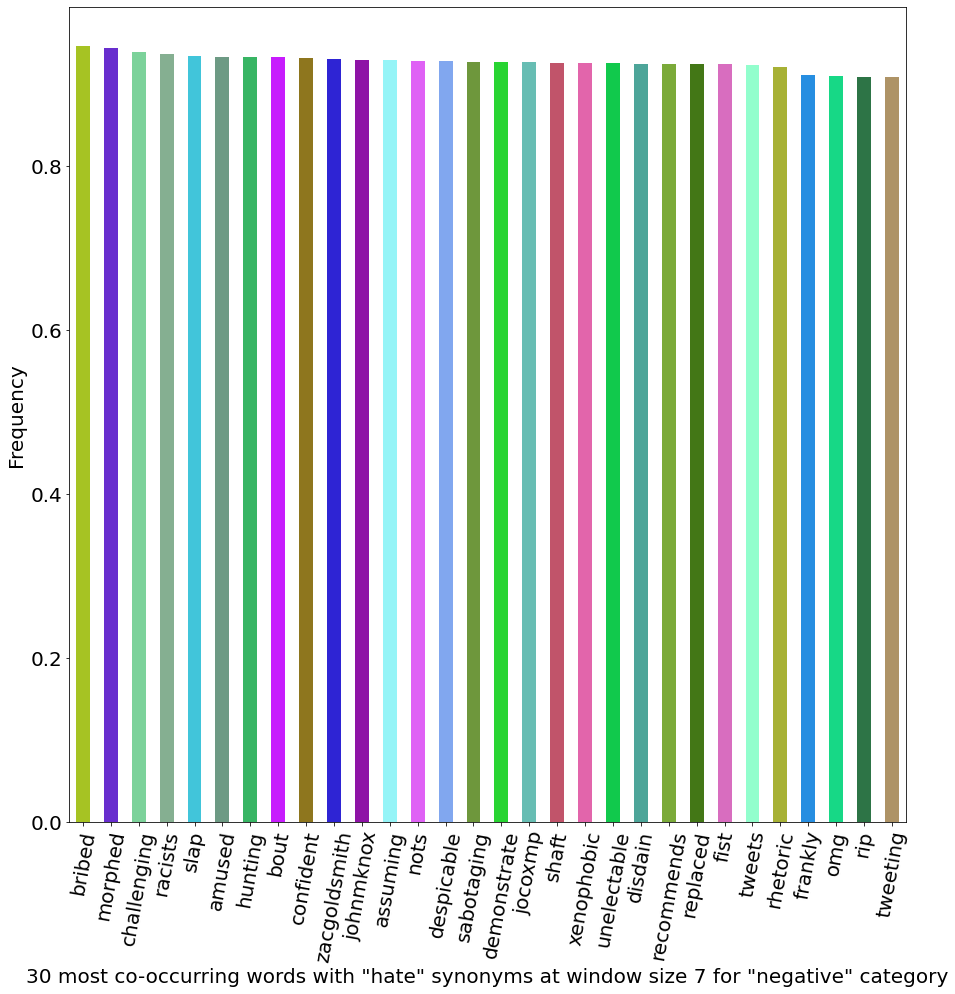

In [164]:
most_30_hate_co_occuring_words_neg_df.plot.bar(x = 'word', y = 'freq',
      figsize = (15, 15),
      legend = False,
      rot = 80,
      ylabel = 'Frequency',
      xlabel = '30 most co-occurring words with "hate" synonyms at window size 7 for "negative" category',
      color = [random_color() for _ in range(len(most_30_hate_co_occuring_words_neg_df))])

In [165]:
#plot_30_most_hate_like_co_occuring(most_30_hate_co_occuring_words_neg_df, 'hate', 'Negative')

<AxesSubplot:xlabel='30 most co-occurring words with "hate" synonyms at window size 7 for "positive" category', ylabel='Frequency'>

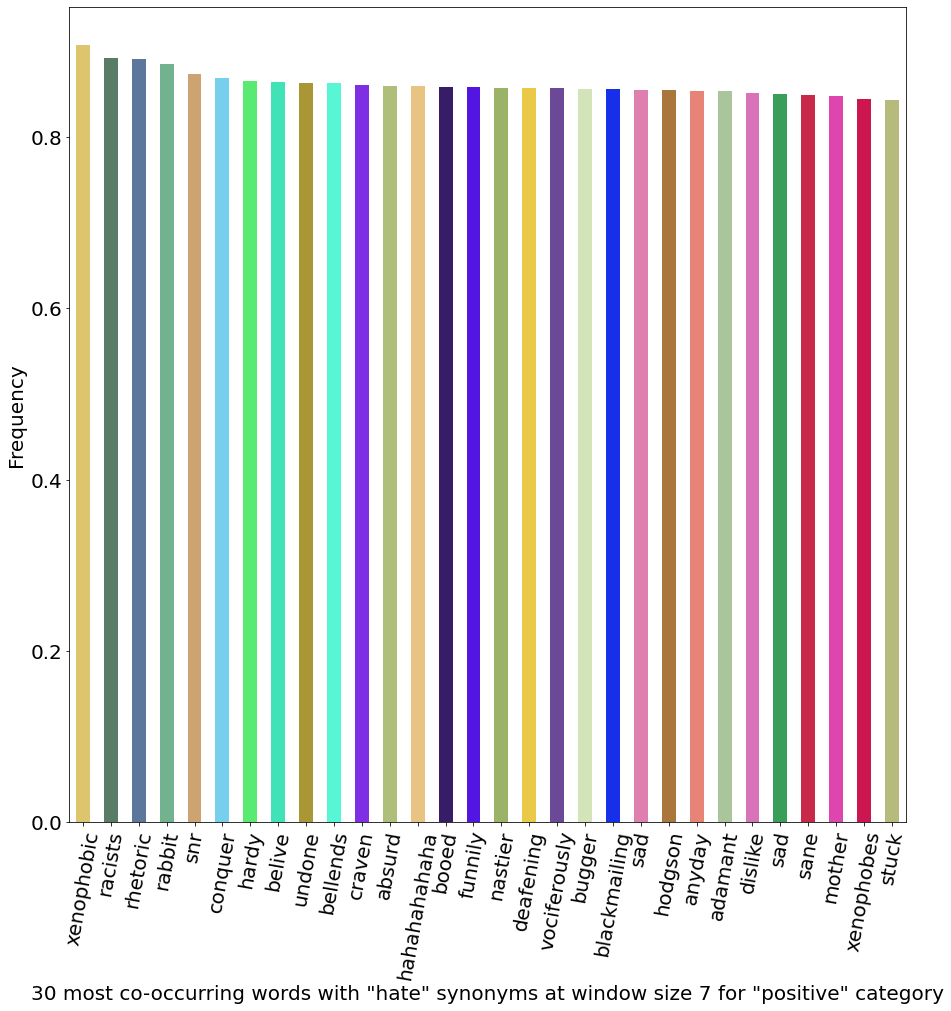

In [166]:
most_30_hate_co_occuring_words_pos_df.plot.bar(x = 'word', y = 'freq',
      figsize = (15, 15),
      legend = False,
      rot = 80,
      ylabel = 'Frequency',
      xlabel = '30 most co-occurring words with "hate" synonyms at window size 7 for "positive" category',
      color = [random_color() for _ in range(len(most_30_hate_co_occuring_words_pos_df))])

In [167]:
#plot_30_most_hate_like_co_occuring(most_30_hate_co_occuring_words_pos_df, 'hate', 'Positive')

# 8
8.	We want to focus on modal verbs (e.g., shall, must, need) to comprehend what need/must/shall be performed in each class. For this purpose, for each class of document, record the sentences that contain modal verbs altogether. Perform a simple count analysis to identify the most frequent words in each class. Then perform named-entity tagger to output the most frequent named-entities in each case, then empath client to record the most dominant categories in each case. 

In [3]:
from nltk.probability import FreqDist

In [4]:
def get_modal_contained_tweets(sr):
    # private solution

In [14]:
pos_preprocessed = get_pos_preprocessed()
neg_preprocessed = get_neg_preprocessed()
neu_preprocessed = get_neu_preprocessed()

In [15]:
pos_modal_contained = get_modal_contained_tweets(pos_preprocessed)

In [16]:
neg_modal_contained = get_modal_contained_tweets(neg_preprocessed)

In [17]:
neu_modal_contained = get_modal_contained_tweets(neu_preprocessed)

In [52]:
def get_freq_dist(sr):
    # private solution

In [41]:
fdist_pos = get_freq_dist(pos_modal_contained)

### 8. showing 20 most frequent words for positive category containig modals

In [42]:
fdist_pos.most_common(20)

[('need', 10805),
 ('good', 1123),
 ('love', 759),
 ('work', 727),
 ('like', 651),
 ('think', 599),
 ('time', 560),
 ('sleep', 552),
 ('shall', 539),
 ('thank', 527),
 ('right', 513),
 ('go', 505),
 ('know', 480),
 ('today', 451),
 ('feel', 413),
 ('help', 407),
 ('haha', 407),
 ('want', 394),
 ('better', 376),
 ('http', 371)]

In [44]:
fdist_neg = get_freq_dist(neg_modal_contained)

### 8. showing 20 most frequent words for negative category containig modals

In [45]:
fdist_neg.most_common(20)

[('need', 5687),
 ('work', 452),
 ('sleep', 429),
 ('feel', 365),
 ('tire', 354),
 ('like', 332),
 ('think', 320),
 ('hate', 311),
 ('go', 310),
 ('today', 294),
 ('time', 262),
 ('sick', 256),
 ('bore', 244),
 ('know', 218),
 ('sorri', 206),
 ('shall', 202),
 ('long', 193),
 ('home', 190),
 ('miss', 187),
 ('night', 184)]

In [46]:
fdist_neu = get_freq_dist(neu_modal_contained)

### 8. showing 20 most frequent words for neutral category containig modals

In [47]:
fdist_neu.most_common(20)

[('need', 10562),
 ('work', 645),
 ('shall', 567),
 ('think', 539),
 ('sleep', 514),
 ('like', 446),
 ('go', 426),
 ('know', 415),
 ('help', 414),
 ('http', 383),
 ('time', 373),
 ('today', 349),
 ('follow', 336),
 ('come', 323),
 ('tomorrow', 283),
 ('miss', 248),
 ('want', 243),
 ('home', 239),
 ('twitter', 221),
 ('start', 214)]

## ---------------------------

In [5]:
import spacy
nlp = # private solution

In [6]:
from collections import Counter as C

In [7]:
def get_doc_pos_modals():
  file_name = 'doc_pos_modals.pkl'
  if os.path.exists(file_name):
    d = pd.read_pickle(file_name)
    return d

  # private solution
  d.to_pickle(file_name)
  return d

In [18]:
doc_pos_modals = get_doc_pos_modals()

In [19]:
def count_words(docs):
  # private solution

In [20]:
def get_counter_pos_modals():
  file_name = 'get_counter_pos_modals.dict'
  if os.path.exists(file_name):
    with open(file_name, 'rb') as f:
      c = pickle.load(f)
    return c
  
  c = count_words(doc_pos_modals)
  with open(file_name, 'wb') as f:
    pickle.dump(c, f)
  return c

In [21]:

counter_pos_modals = get_counter_pos_modals()

In [22]:
def get_doc_neg_modals():
  file_name = 'doc_neg_modals.pkl'
  if os.path.exists(file_name):
    return pd.read_pickle(file_name)

  # private solution
  d.to_pickle(file_name)
  return d

In [23]:
doc_neg_modals = get_doc_neg_modals()

In [24]:
def get_counter_neg_modals():
  file_name = 'get_counter_neg_modals.dict'
  if os.path.exists(file_name):
    with open(file_name, 'rb') as f:
      c = pickle.load(f)
    return c


  # private solution
  with open(file_name, 'wb') as f:
    pickle.dump(c, f)
  return c

In [25]:
counter_neg_modals = get_counter_neg_modals()

In [26]:
def get_doc_neu_modals():
  file_name = 'doc_neu_modals.pkl'
  if os.path.exists(file_name):
    return pd.read_pickle(file_name)


  # private solution
  d.to_pickle(file_name)
  return d

In [27]:
doc_neu_modals = get_doc_neu_modals()

In [28]:
def get_counter_neu_modals():
  file_name = 'get_counter_neu_modals.dict'
  if os.path.exists(file_name):
    with open(file_name, 'rb') as f:
      c = pickle.load(f)
    return c


  c = count_words(doc_neu_modals)
  with open(file_name, 'wb') as f:
    pickle.dump(c, f)
  return c

In [29]:
counter_neu_modals = get_counter_neu_modals()

In [30]:
def get_counter_neu_ser_modals():
  file_name = 'counter_neu_ser_modals.pkl'
  if os.path.exists(file_name):
    return pd.read_pickle(file_name)
  

  c = pd.Series(counter_neu_modals)
  c.to_pickle(file_name)
  return c

In [31]:
def get_counter_neg_ser_modals():
  file_name = 'counter_neg_ser_modals.pkl'
  if os.path.exists(file_name):
    return pd.read_pickle(file_name)
 

  c = pd.Series(counter_neg_modals)
  c.to_pickle(file_name)
  return c

In [32]:
def get_counter_pos_ser_modals():
  file_name = 'counter_pos_ser_modals.pkl'
  if os.path.exists(file_name):
    return pd.read_pickle(file_name)
  

  c = pd.Series(counter_pos_modals)
  c.to_pickle(file_name)
  return c

In [33]:
counter_neg_ser_modals = get_counter_neg_ser_modals()

In [34]:
counter_pos_ser_modals = get_counter_pos_ser_modals()

In [35]:
counter_neu_ser_modals = get_counter_neu_ser_modals()

### 8. showing the 20 most frequent named entities for negative category containing modals

In [36]:
counter_neg_ser_modals.sort_values(ascending=False).head(20)

today         266
tomorrow      136
tonight        95
week           38
half           36
sunday         31
summer         27
weekend        25
monday         24
night          23
mayb           22
english        21
chang          20
saturday       19
sorri          17
friday         17
yesterday      15
replac         14
month          14
late night     13
dtype: int64

### 8. showing the 20 most frequent named entities for positive category containing modals

In [37]:
counter_pos_ser_modals.sort_values(ascending=False).head(20)

today        416
tomorrow     258
tonight      182
summer        66
week          62
yesterday     56
weekend       55
mayb          52
sunday        46
night         45
monday        44
friday        41
hahaha        38
haha          36
saturday      34
chang         33
one           28
happi         27
onlin         26
hour          25
dtype: int64

### 8. showing the 20 most frequent named entities for neutral category containing modals

In [38]:
counter_neu_ser_modals.sort_values(ascending=False).head(20)

today         311
tomorrow      240
tonight       136
week           66
summer         66
yesterday      46
friday         45
mayb           43
weekend        40
sunday         38
chang          37
monday         32
need studi     29
saturday       26
night          25
need coffe     24
hour           24
tuesday        22
month          22
second         21
dtype: int64

## ---------------------

In [93]:
from empath import Empath
lexicon = # private solution


In [94]:
def infer_cat(df):
    # private solution

In [95]:
def get_infered_cat_pos_modals():
  file_name = 'infered_cat_pos_modals.set'
  if os.path.exists(file_name):
    with open(file_name, 'rb') as f:
      c = pickle.load(f)
    return c
  
  try:
    pos_modal_contained
  except NameError:
    try:
        pos_modal_contained = get_modal_contained_tweets(pos_preprocessed)
    except NameError:
        pos_preprocessed = get_pos_preprocessed()
        pos_modal_contained = get_modal_contained_tweets(pos_preprocessed)
        

  c = infer_cat(pos_modal_contained)
  with open(file_name, 'wb') as f:
    pickle.dump(c, f)
  return c

In [96]:
def get_infered_cat_neg_modals():
  file_name = 'infered_cat_neg_modals.set'
  if os.path.exists(file_name):
    with open(file_name, 'rb') as f:
      c = pickle.load(f)
    return c
  
  try:
    neg_modal_contained
  except NameError:
    try:
        neg_modal_contained = get_modal_contained_tweets(neg_preprocessed)
    except NameError:
        neg_preprocessed = get_neg_preprocessed()
        neg_modal_contained = get_modal_contained_tweets(neg_preprocessed)
        
  c = infer_cat(neg_modal_contained)
  with open(file_name, 'wb') as f:
    pickle.dump(c, f)
  return c

In [97]:
def get_infered_cat_neu_modals():
  file_name = 'infered_cat_neu_modals.set'
  if os.path.exists(file_name):
    with open(file_name, 'rb') as f:
      c = pickle.load(f)
    return c
  
  try:
    neu_modal_contained
  except NameError:
    try:
        neu_modal_contained = get_modal_contained_tweets(neu_preprocessed)
    except NameError:
        neu_preprocessed = get_neu_preprocessed()
        neu_modal_contained = get_modal_contained_tweets(neu_preprocessed)
        
  c = infer_cat(neu_modal_contained)
  with open(file_name, 'wb') as f:
    pickle.dump(c, f)
  return c

In [98]:
infered_cat_pos_modals = get_infered_cat_pos_modals()
infered_cat_neg_modals = get_infered_cat_neg_modals()
infered_cat_neu_modals = get_infered_cat_neu_modals()

### 8. showing categories recognized by Empath for positive class containing modals

In [99]:
infered_cat_pos_modals

{'achievement',
 'affection',
 'aggression',
 'air_travel',
 'alcohol',
 'ancient',
 'anger',
 'animal',
 'anonymity',
 'anticipation',
 'appearance',
 'art',
 'attractive',
 'banking',
 'beach',
 'beauty',
 'blue_collar_job',
 'body',
 'breaking',
 'business',
 'car',
 'celebration',
 'cheerfulness',
 'childish',
 'children',
 'cleaning',
 'clothing',
 'cold',
 'college',
 'communication',
 'competing',
 'computer',
 'confusion',
 'contentment',
 'cooking',
 'crime',
 'dance',
 'death',
 'deception',
 'disappointment',
 'disgust',
 'dispute',
 'divine',
 'domestic_work',
 'dominant_heirarchical',
 'dominant_personality',
 'driving',
 'eating',
 'economics',
 'emotional',
 'envy',
 'exasperation',
 'exercise',
 'exotic',
 'fabric',
 'family',
 'farming',
 'fashion',
 'fear',
 'feminine',
 'fight',
 'fire',
 'friends',
 'fun',
 'furniture',
 'gain',
 'giving',
 'government',
 'hate',
 'healing',
 'health',
 'hearing',
 'help',
 'heroic',
 'hiking',
 'hipster',
 'home',
 'horror',
 'hygi

### 8. showing categories recognized by Empath for negative class containing modals

In [100]:
infered_cat_neg_modals

{'achievement',
 'affection',
 'aggression',
 'air_travel',
 'alcohol',
 'ancient',
 'anger',
 'animal',
 'anonymity',
 'anticipation',
 'appearance',
 'art',
 'attractive',
 'banking',
 'beach',
 'beauty',
 'blue_collar_job',
 'body',
 'breaking',
 'business',
 'car',
 'celebration',
 'cheerfulness',
 'childish',
 'children',
 'cleaning',
 'clothing',
 'cold',
 'college',
 'communication',
 'competing',
 'computer',
 'confusion',
 'contentment',
 'cooking',
 'crime',
 'dance',
 'death',
 'deception',
 'disappointment',
 'disgust',
 'dispute',
 'divine',
 'domestic_work',
 'dominant_heirarchical',
 'dominant_personality',
 'driving',
 'eating',
 'economics',
 'emotional',
 'envy',
 'exasperation',
 'exercise',
 'exotic',
 'fabric',
 'family',
 'farming',
 'fashion',
 'fear',
 'feminine',
 'fight',
 'fire',
 'friends',
 'fun',
 'furniture',
 'gain',
 'giving',
 'government',
 'hate',
 'healing',
 'health',
 'hearing',
 'help',
 'heroic',
 'hiking',
 'hipster',
 'home',
 'horror',
 'hygi

### 8. showing categories recognized by Empath for neutral class containing modals

In [101]:
infered_cat_neu_modals

{'achievement',
 'affection',
 'aggression',
 'air_travel',
 'alcohol',
 'ancient',
 'anger',
 'animal',
 'anticipation',
 'appearance',
 'art',
 'attractive',
 'banking',
 'beach',
 'beauty',
 'blue_collar_job',
 'body',
 'breaking',
 'business',
 'car',
 'celebration',
 'cheerfulness',
 'childish',
 'children',
 'cleaning',
 'clothing',
 'cold',
 'college',
 'communication',
 'competing',
 'computer',
 'confusion',
 'contentment',
 'cooking',
 'crime',
 'dance',
 'death',
 'deception',
 'disappointment',
 'disgust',
 'dispute',
 'divine',
 'domestic_work',
 'dominant_heirarchical',
 'dominant_personality',
 'driving',
 'eating',
 'economics',
 'emotional',
 'envy',
 'exasperation',
 'exercise',
 'exotic',
 'fabric',
 'family',
 'farming',
 'fashion',
 'fear',
 'feminine',
 'fight',
 'fire',
 'friends',
 'fun',
 'furniture',
 'gain',
 'giving',
 'government',
 'hate',
 'healing',
 'health',
 'hearing',
 'help',
 'heroic',
 'hiking',
 'hipster',
 'home',
 'horror',
 'hygiene',
 'indepe

# 9
9.	Repeat the above process when considering “wish”. Identify a set of semantically equivalent wording to “wish” and repeat the process 8) to identify frequent words, frequent named-entities and categories.

### 9. showing semantically related words to 'wish'

In [41]:
syns_for_wish = get_syn('wish')
syns_for_wish

{'bid',
 'care',
 'compliments',
 'indirect_request',
 'like',
 'regard',
 'want',
 'wish',
 'wish_well',
 'wishing'}

In [43]:
def get_wish_contained_tweets(sr):
    # private solution

In [44]:
pos_preprocessed = get_pos_preprocessed()
neg_preprocessed = get_neg_preprocessed()
neu_preprocessed = get_neu_preprocessed()

In [45]:
pos_wish_contained = get_wish_contained_tweets(pos_preprocessed)

In [48]:
neg_wish_contained = get_wish_contained_tweets(neg_preprocessed)

In [50]:
neu_wish_contained = get_wish_contained_tweets(neu_preprocessed)

In [53]:
fdist_pos = get_freq_dist(pos_wish_contained)

### 9. showing 20 most frequent words for positive class containing 'wish' related words

In [54]:
fdist_pos.most_common(20)

[('like', 22864),
 ('want', 15716),
 ('wish', 9323),
 ('good', 4289),
 ('love', 3905),
 ('look', 3035),
 ('feel', 2811),
 ('know', 2287),
 ('go', 2284),
 ('sound', 2176),
 ('time', 2171),
 ('work', 2092),
 ('haha', 1976),
 ('right', 1964),
 ('http', 1908),
 ('think', 1842),
 ('today', 1788),
 ('thank', 1765),
 ('come', 1557),
 ('great', 1521)]

In [55]:
fdist_neg = get_freq_dist(neg_wish_contained)

### 9. showing 20 most frequent words for negative class containing 'wish' related words

In [56]:
fdist_neg.most_common(20)

[('like', 11555),
 ('want', 7465),
 ('wish', 3357),
 ('feel', 3116),
 ('look', 1429),
 ('work', 1324),
 ('hate', 1320),
 ('go', 1289),
 ('sick', 1171),
 ('today', 1089),
 ('know', 998),
 ('time', 922),
 ('sleep', 901),
 ('bore', 894),
 ('care', 892),
 ('miss', 884),
 ('sorri', 873),
 ('think', 851),
 ('tire', 840),
 ('home', 757)]

In [58]:
fdist_neu = get_freq_dist(neu_wish_contained)

### 9. showing 20 most frequent words for neutral class containing 'wish' related words

In [59]:
fdist_neu.most_common(20)

[('like', 17312),
 ('want', 14224),
 ('wish', 10213),
 ('feel', 2466),
 ('look', 2250),
 ('work', 2064),
 ('go', 2017),
 ('http', 1695),
 ('know', 1596),
 ('today', 1465),
 ('come', 1262),
 ('think', 1195),
 ('home', 1153),
 ('dont', 1110),
 ('time', 1097),
 ('watch', 1032),
 ('care', 974),
 ('sleep', 904),
 ('miss', 887),
 ('need', 783)]

## ---------------------------

In [60]:
import spacy
nlp = # private solution

In [61]:
from collections import Counter as C

In [62]:
def get_doc_pos_wish():
  file_name = 'doc_pos_wish.pkl'
  if os.path.exists(file_name):
    d = pd.read_pickle(file_name)
    return d

  # private solution
  d.to_pickle(file_name)
  return d

In [63]:
doc_pos_wish = get_doc_pos_wish()

In [64]:
def count_words(docs):
  # private solution

In [65]:
def get_counter_pos_wish():
  file_name = 'get_counter_pos_wish.dict'
  if os.path.exists(file_name):
    with open(file_name, 'rb') as f:
      c = pickle.load(f)
    return c
  
  c = count_words(doc_pos_wish)
  with open(file_name, 'wb') as f:
    pickle.dump(c, f)
  return c

In [66]:

counter_pos_wish = get_counter_pos_wish()

In [67]:
def get_doc_neg_wish():
  file_name = 'doc_neg_wish.pkl'
  if os.path.exists(file_name):
    return pd.read_pickle(file_name)

  # private solution
  d.to_pickle(file_name)
  return d

In [68]:
doc_neg_wish = get_doc_neg_wish()

In [69]:
def get_counter_neg_wish():
  file_name = 'get_counter_neg_wish.dict'
  if os.path.exists(file_name):
    with open(file_name, 'rb') as f:
      c = pickle.load(f)
    return c


  # private solution
  with open(file_name, 'wb') as f:
    pickle.dump(c, f)
  return c

In [70]:
counter_neg_wish = get_counter_neg_wish()

In [71]:
def get_doc_neu_wish():
  file_name = 'doc_neu_wish.pkl'
  if os.path.exists(file_name):
    return pd.read_pickle(file_name)


  # private solution
  d.to_pickle(file_name)
  return d

In [72]:
doc_neu_wish = get_doc_neu_wish()

In [73]:
def get_counter_neu_wish():
  file_name = 'get_counter_neu_wish.dict'
  if os.path.exists(file_name):
    with open(file_name, 'rb') as f:
      c = pickle.load(f)
    return c


  # private solution
  with open(file_name, 'wb') as f:
    pickle.dump(c, f)
  return c

In [74]:
counter_neu_wish = get_counter_neu_wish()

In [75]:
def get_counter_neu_ser_wish():
  file_name = 'counter_neu_ser_wish.pkl'
  if os.path.exists(file_name):
    return pd.read_pickle(file_name)
  

  c = pd.Series(counter_neu_wish)
  c.to_pickle(file_name)
  return c

In [76]:
def get_counter_neg_ser_wish():
  file_name = 'counter_neg_ser_wish.pkl'
  if os.path.exists(file_name):
    return pd.read_pickle(file_name)
 

  c = pd.Series(counter_neg_wish)
  c.to_pickle(file_name)
  return c

In [77]:
def get_counter_pos_ser_wish():
  file_name = 'counter_pos_ser_wish.pkl'
  if os.path.exists(file_name):
    return pd.read_pickle(file_name)
  

  c = pd.Series(counter_pos_wish)
  c.to_pickle(file_name)
  return c

In [78]:
counter_neg_ser_wish = get_counter_neg_ser_wish()

In [79]:
counter_pos_ser_wish = get_counter_pos_ser_wish()

In [80]:
counter_neu_ser_wish = get_counter_neu_ser_wish()

### 9. showing 20 most frequent named entities for negative class containing 'wish' related words

In [81]:
counter_neg_ser_wish.sort_values(ascending=False).head(20)

today        976
tomorrow     372
tonight      356
summer       148
half         125
week         124
yesterday    114
monday       101
sunday        91
scari         84
friday        83
saturday      79
kinda         79
chang         75
weekend       74
night         72
year          55
forev         50
hour          48
mayb          47
dtype: int64

### 9. showing 20 most frequent named entities for positive class containing 'wish' related words

In [82]:
counter_pos_ser_wish.sort_values(ascending=False).head(20)

today        1572
tonight       732
tomorrow      688
summer        272
happi         271
yesterday     259
week          234
friday        215
sunday        206
monday        163
saturday      152
hahaha        149
weekend       145
chang         143
year          137
night         121
sunni         117
mayb          108
kinda         108
london        105
dtype: int64

### 9. showing 20 most frequent named entities for neutral class containing 'wish' related words

In [83]:
counter_neu_ser_wish.sort_values(ascending=False).head(20)

today        1325
tomorrow      686
tonight       650
summer        254
friday        193
week          166
monday        165
yesterday     148
chang         134
sunday        127
weekend       115
saturday      112
forev          96
year           95
london         85
second         83
mayb           82
night          82
kinda          76
month          74
dtype: int64

## ---------------------

In [84]:
from empath import Empath
lexicon = # private solution


In [85]:
def get_infered_cat_pos_wish():
  file_name = 'infered_cat_pos_wish.set'
  if os.path.exists(file_name):
    with open(file_name, 'rb') as f:
      c = pickle.load(f)
    return c
  
  try:
    pos_wish_contained
  except NameError:
    try:
        pos_wish_contained = get_wish_contained_tweets(pos_preprocessed)
    except NameError:
        pos_preprocessed = get_pos_preprocessed()
        pos_wish_contained = get_wish_contained_tweets(pos_preprocessed)
        

  c = infer_cat(pos_wish_contained)
  with open(file_name, 'wb') as f:
    pickle.dump(c, f)
  return c

In [86]:
def get_infered_cat_neg_wish():
  file_name = 'infered_cat_neg_wish.set'
  if os.path.exists(file_name):
    with open(file_name, 'rb') as f:
      c = pickle.load(f)
    return c
  
  try:
    neg_wish_contained
  except NameError:
    try:
        neg_wish_contained = get_wish_contained_tweets(neg_preprocessed)
    except NameError:
        neg_preprocessed = get_neg_preprocessed()
        neg_wish_contained = get_wish_contained_tweets(neg_preprocessed)
        
  c = infer_cat(neg_wish_contained)
  with open(file_name, 'wb') as f:
    pickle.dump(c, f)
  return c

In [87]:
def get_infered_cat_neu_wish():
  file_name = 'infered_cat_neu_wish.set'
  if os.path.exists(file_name):
    with open(file_name, 'rb') as f:
      c = pickle.load(f)
    return c
  
  try:
    neu_wish_contained
  except NameError:
    try:
        neu_wish_contained = get_wish_contained_tweets(neu_preprocessed)
    except NameError:
        neu_preprocessed = get_neu_preprocessed()
        neu_wish_contained = get_wish_contained_tweets(neu_preprocessed)
        
  c = infer_cat(neu_wish_contained)
  with open(file_name, 'wb') as f:
    pickle.dump(c, f)
  return c

In [91]:
infered_cat_pos_wish = get_infered_cat_pos_wish()
infered_cat_neg_wish = get_infered_cat_neg_wish()
infered_cat_neu_wish = get_infered_cat_neu_wish()

### 9. showing categories recognized by Empath for positive class containing 'wish' related words

In [92]:
infered_cat_pos_wish

{'achievement',
 'affection',
 'aggression',
 'air_travel',
 'alcohol',
 'ancient',
 'anger',
 'animal',
 'anonymity',
 'anticipation',
 'appearance',
 'art',
 'attractive',
 'banking',
 'beach',
 'beauty',
 'blue_collar_job',
 'body',
 'breaking',
 'business',
 'car',
 'celebration',
 'cheerfulness',
 'childish',
 'children',
 'cleaning',
 'clothing',
 'cold',
 'college',
 'communication',
 'competing',
 'computer',
 'confusion',
 'contentment',
 'cooking',
 'crime',
 'dance',
 'death',
 'deception',
 'disappointment',
 'disgust',
 'dispute',
 'divine',
 'domestic_work',
 'dominant_heirarchical',
 'dominant_personality',
 'driving',
 'eating',
 'economics',
 'emotional',
 'envy',
 'exasperation',
 'exercise',
 'exotic',
 'fabric',
 'family',
 'farming',
 'fashion',
 'fear',
 'feminine',
 'fight',
 'fire',
 'friends',
 'fun',
 'furniture',
 'gain',
 'giving',
 'government',
 'hate',
 'healing',
 'health',
 'hearing',
 'help',
 'heroic',
 'hiking',
 'hipster',
 'home',
 'horror',
 'hygi

### 9. showing categories recognized by Empath for negative class containing 'wish' related words

In [93]:
infered_cat_neg_wish

{'achievement',
 'affection',
 'aggression',
 'air_travel',
 'alcohol',
 'ancient',
 'anger',
 'animal',
 'anonymity',
 'anticipation',
 'appearance',
 'art',
 'attractive',
 'banking',
 'beach',
 'beauty',
 'blue_collar_job',
 'body',
 'breaking',
 'business',
 'car',
 'celebration',
 'cheerfulness',
 'childish',
 'children',
 'cleaning',
 'clothing',
 'cold',
 'college',
 'communication',
 'competing',
 'computer',
 'confusion',
 'contentment',
 'cooking',
 'crime',
 'dance',
 'death',
 'deception',
 'disappointment',
 'disgust',
 'dispute',
 'divine',
 'domestic_work',
 'dominant_heirarchical',
 'dominant_personality',
 'driving',
 'eating',
 'economics',
 'emotional',
 'envy',
 'exasperation',
 'exercise',
 'exotic',
 'fabric',
 'family',
 'farming',
 'fashion',
 'fear',
 'feminine',
 'fight',
 'fire',
 'friends',
 'fun',
 'furniture',
 'gain',
 'giving',
 'government',
 'hate',
 'healing',
 'health',
 'hearing',
 'help',
 'heroic',
 'hiking',
 'hipster',
 'home',
 'horror',
 'hygi

### 9. showing categories recognized by Empath for neutral class containing 'wish' related words

In [94]:
infered_cat_neu_wish

{'achievement',
 'affection',
 'aggression',
 'air_travel',
 'alcohol',
 'ancient',
 'anger',
 'animal',
 'anonymity',
 'anticipation',
 'appearance',
 'art',
 'attractive',
 'banking',
 'beach',
 'beauty',
 'blue_collar_job',
 'body',
 'breaking',
 'business',
 'car',
 'celebration',
 'cheerfulness',
 'childish',
 'children',
 'cleaning',
 'clothing',
 'cold',
 'college',
 'communication',
 'competing',
 'computer',
 'confusion',
 'contentment',
 'cooking',
 'crime',
 'dance',
 'death',
 'deception',
 'disappointment',
 'disgust',
 'dispute',
 'divine',
 'domestic_work',
 'dominant_heirarchical',
 'dominant_personality',
 'driving',
 'eating',
 'economics',
 'emotional',
 'envy',
 'exasperation',
 'exercise',
 'exotic',
 'fabric',
 'family',
 'farming',
 'fashion',
 'fear',
 'feminine',
 'fight',
 'fire',
 'friends',
 'fun',
 'furniture',
 'gain',
 'giving',
 'government',
 'hate',
 'healing',
 'health',
 'hearing',
 'help',
 'heroic',
 'hiking',
 'hipster',
 'home',
 'horror',
 'hygi